#### Problem Statement:

An X Education need help to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires us to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

#### Final Objective:


Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

#### Data Steps:

1. Data Preprocessing and EDA.
2. Feature Engineering
3. Train Test split
4. Model Building
5. Model Parameters explanation and finding optimal parameters based on the dataset.
6. Model Results comparison 


#### Import Necessary Packages:

In [1308]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics

#### Pandas Rows and configuration: 

In [1309]:
### set this max rows and columns in the dataset.
pd.set_option("display.max_columns", 1000)
pd.set_option("display.max_rows", 1000)

#### Current Filepath and read the csv file: 

In [1310]:
##### import current directory path from the file
filepath = os.path.join(os.getcwd(), os.getcwd(), "Leads.csv")

print("current-filepath=", filepath)

#### import csv file using current directory path
lead_data = pd.read_csv(filepath)

current-filepath= E:\upgrad_course_material\Upgrad_course\Introduction to ML\case_study\Lead+Scoring+Case+Study\Lead Scoring Assignment\Leads.csv


In [1311]:
#### columns and data type information related to the dataset.
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [1312]:
####shape of the dataset
lead_data.shape

(9240, 37)

#### We can see that total 9240 rows and 37 total columns present in the dataset.

In [1313]:
print("Total Columns in the lead_dataset : ", lead_data.columns)

Total Columns in the lead_dataset :  Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity

### Statistical summary related to the dataset.

In [1314]:
lead_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [1315]:
##### check the sample data from the lead dataset.
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


#### Observations:
- In few category columns, we have particular category named Select. We need to replace this particular category select as null values because user did not selected any option.so assuming it is a null value , replacing it.

In [1316]:
#### replacing select value as null values.
lead_data = lead_data.replace("Select",np.NaN)

#### Missing value information related to the dataset.

In [1317]:
def missing_value_df_percentage(df,threshold_to_identify):
    """
    In DataFrame,we need to convert various data types into structured one.

            Parameter(s):
            ------------
                df : DataFrame of the previous application dataset/application dataset
                threshold_to_identify : identify the missing values percentage which is greater than threshold.

            Return(s):
            ---------
                missing_value_df : Missing_value_dataframe
    """
    ######missing value creating dataframe for column name and misisng value percentage
    missing_value_df = pd.DataFrame(columns=["Column_Name","Missing_value_percentage"])
    
    #### iterating through the each column and calculating missing value percentage.
    for col in df.columns:
        ##### calculate missing value percentage for each column from the dataset.
        missing_percentage = round((100*df[col].isna().sum())/(df.shape[0]),2)
        ## append each and every row and append calculated missing value field.
        missing_value_df = missing_value_df.append({"Column_Name":col,"Missing_value_percentage":missing_percentage},ignore_index=True)
    
    ## eliminate missing value percentage should be greater than threshold value
    missing_value_df = missing_value_df[missing_value_df["Missing_value_percentage"]>threshold_to_identify].sort_values(by="Missing_value_percentage",ascending=False).reset_index(drop=True)
    
    
    return missing_value_df
    

In [1318]:
## overall missing value percentage
missing_value_df_percentage(lead_data,0.0)

,Column_Name,Missing_value_percentage
0,How did you hear about X Education,78.46
1,Lead Profile,74.19
2,Lead Quality,51.59
3,Asymmetrique Profile Score,45.65
4,Asymmetrique Activity Score,45.65
5,Asymmetrique Profile Index,45.65
6,Asymmetrique Activity Index,45.65
7,City,39.71
8,Specialization,36.58
9,Tags,36.29


#### Observations for lead Dataset: 
#### 1.Total 16 columns has missing values out of 37 columns,we can ignore the columns whenever less than 40% percentage.
#### We have a problem if missing value percentage is greater than 50 percentage.

#### 2. Proportion of missing columns over total columns  = (16/37)*100 = 43%.


#### Eliminate Missing values columns based on the 40% threshold.

In [1319]:
def missing_values_elimination(df,threshold_to_eliminate):
    """
    In DataFrame,we need to convert various data types into structured one.

            Parameter(s):
            ------------
                df : DataFrame of the lead dataset.
                threshold_to_eliminate : Eliminate the missing values columns(missing_value_percentage>threshold) eliminate it

            Return(s):
            ---------
                final_df :  Elimination of few columns based on the threshold.
                
    """
    
    ###### eliminate the columns if missing value percentage is greater than threshold.
    columns_to_drop = df.columns[df.isnull().sum() >= (threshold_to_eliminate*len(df))]
    
    print("{} columns are greater than threshold out of {} columns".format(len(columns_to_drop),len(df.columns)))    
    
    print("Eliminating these columns from  the dataset",columns_to_drop)
    
    #### dropping the columns from the original dataset.
    final_df = df.drop(columns_to_drop, axis = 1)
        
    #### print the columns from the final dataset.
    print("New Columns Length:",len(final_df.columns))    

    return final_df

#### Missing Values columns Elimination in lead Dataset:

In [1320]:
final_lead_dataset = missing_values_elimination(lead_data,0.40)

7 columns are greater than threshold out of 37 columns
Eliminating these columns from  the dataset Index(['How did you hear about X Education', 'Lead Quality', 'Lead Profile',
       'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score'],
      dtype='object')
New Columns Length: 30


In [1321]:
#### final dataset.
final_lead_dataset.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,No,NaN,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,NaN,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


#### Eliminate unnecessary columns in the dataset:
#### 1. check only one category exists in categorical columns eliminate it.
#### 2. Eliminate unnecessary columns ids.

#### 1. check only one category exists in categorical columns eliminate it.

In [1322]:
def check_unique_categories(dataset,value):
    """
    df: dataframe name
    value: atleast more than value count category count should be present
    """
    ###### check the unique category from the each and every column.
    category_count = dataset.nunique()
    
    #### return category dataframe based on the unique count
    category_df = pd.DataFrame(category_count,columns=["unique_categories"])
    
    #### index as seperate column
    category_df.reset_index(inplace=True)
    
    ##### rename the index column as column name in the dataset.
    category_df.rename(columns={"index":"column_name"},inplace=True)
    
    
    #### return the columns where only one category exists in the columns
    category_df = category_df[category_df["unique_categories"]<=value]
    
    
    return category_df

In [1323]:
#### print the column names only one category exists.
check_unique_categories(final_lead_dataset,1)

,column_name,unique_categories
16,Magazine,1
22,Receive More Updates About Our Courses,1
24,Update me on Supply Chain Content,1
25,Get updates on DM Content,1
27,I agree to pay the amount through cheque,1


#### Eliminated unnecessary columns in the categories:

In [1324]:
##### eliminate columns which have only one category exists in the dataset.
final_lead_dataset.drop(columns=
                        ["Magazine","Receive More Updates About Our Courses",
                         "Update me on Supply Chain Content","Get updates on DM Content",
                         "I agree to pay the amount through cheque","Prospect ID"],inplace=True)

In [1325]:
final_lead_dataset.dtypes

Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Newspaper Article                                 object
X Education Forums                                object
Newspaper                      

#### Observations:
#### 1. Eliminated prospect id as well, since we cant perform any analysis on that particular category.

#### Missing values rows Elimination:
#### 1. Eliminate missing values percentage if it is less than 5%.


In [1326]:
##### check the missing values percentage for all columns
missing_value_df_percentage(final_lead_dataset,0.0)

,Column_Name,Missing_value_percentage
0,City,39.71
1,Specialization,36.58
2,Tags,36.29
3,What matters most to you in choosing a course,29.32
4,What is your current occupation,29.11
5,Country,26.63
6,TotalVisits,1.48
7,Page Views Per Visit,1.48
8,Last Activity,1.11
9,Lead Source,0.39


#### Insights:
- Eliminate missing values rows if missing value percentage is less than 5%.

In [1327]:
##### eliminated missing values rows if missing value percentage is less than 5%.
final_lead_dataset.dropna(subset=["TotalVisits","Page Views Per Visit","Last Activity","Lead Source"],inplace=True)

In [1328]:
final_lead_dataset.head(5)

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,Interested in other courses,NaN,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,NaN,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Mumbai,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,Mumbai,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Mumbai,No,Modified


Insights:
- Eliminated 2% data out of 9239 rows, we have considered only 9074(98% of the data) for our analysis.

#### EDA and Data Cleaning:
#### Univariate Analysis:
#### 1. Check each category wise distribution for categorical columns and replace missing values with the most frequent category.
#### 2. Check distribution for numerical columns and replace missing values and eliminate outliers and map data type properly.


#### Univariate Analysis for categorical columns:

In [1329]:
final_lead_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 24 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Number                                    9074 non-null   int64  
 1   Lead Origin                                    9074 non-null   object 
 2   Lead Source                                    9074 non-null   object 
 3   Do Not Email                                   9074 non-null   object 
 4   Do Not Call                                    9074 non-null   object 
 5   Converted                                      9074 non-null   int64  
 6   TotalVisits                                    9074 non-null   float64
 7   Total Time Spent on Website                    9074 non-null   int64  
 8   Page Views Per Visit                           9074 non-null   float64
 9   Last Activity                                  9074 

In [1330]:
categorical_columns= final_lead_dataset.select_dtypes(include=['object']).columns

In [1331]:
categorical_columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

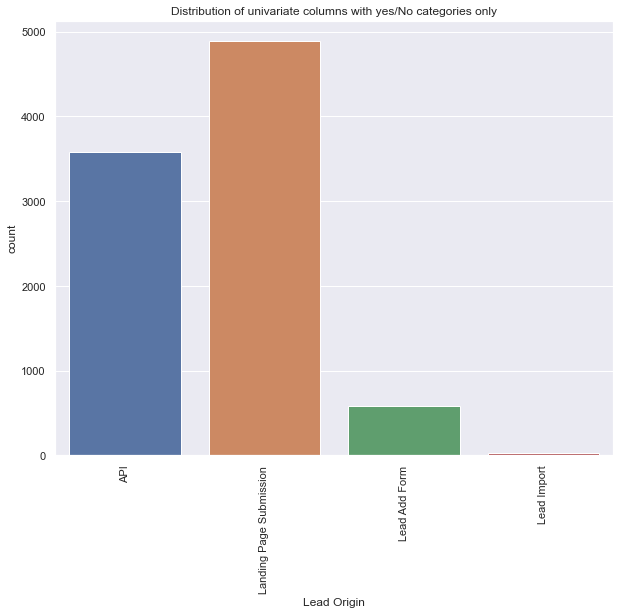

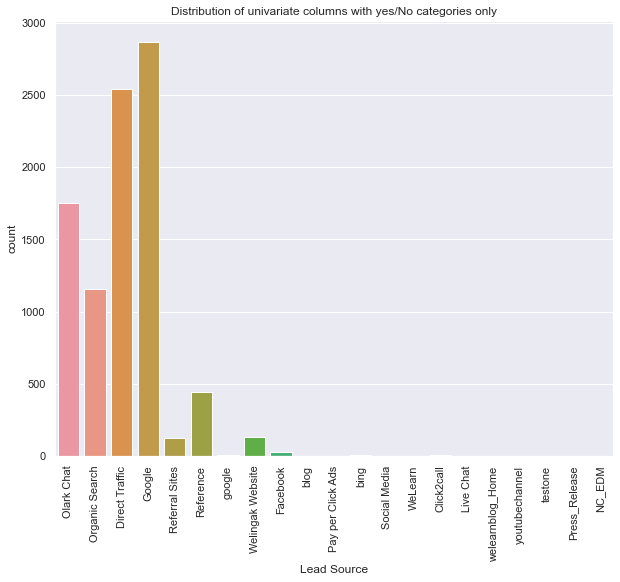

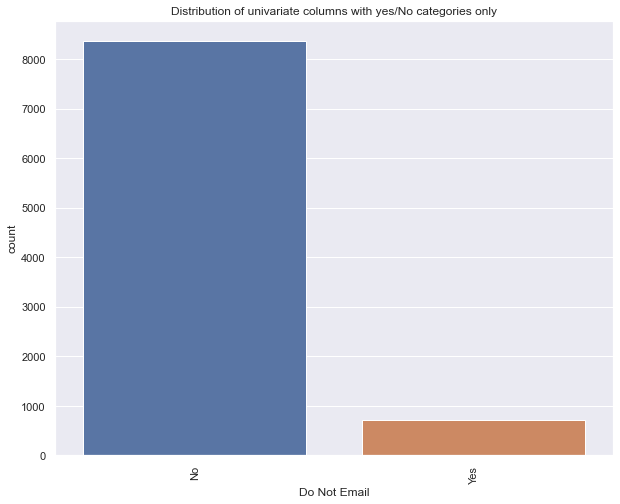

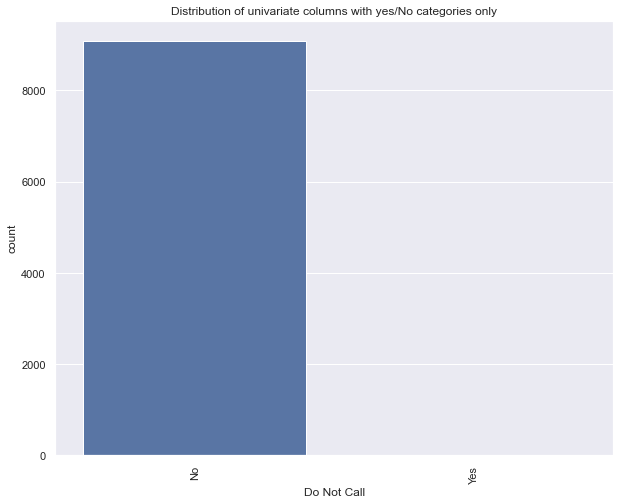

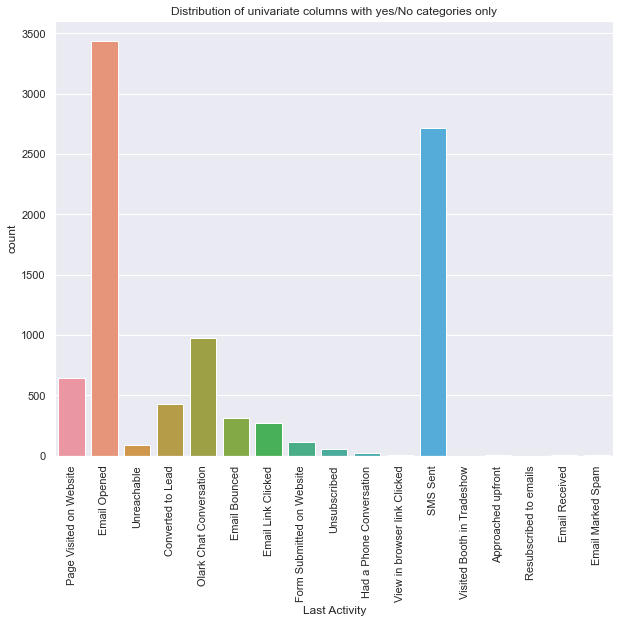

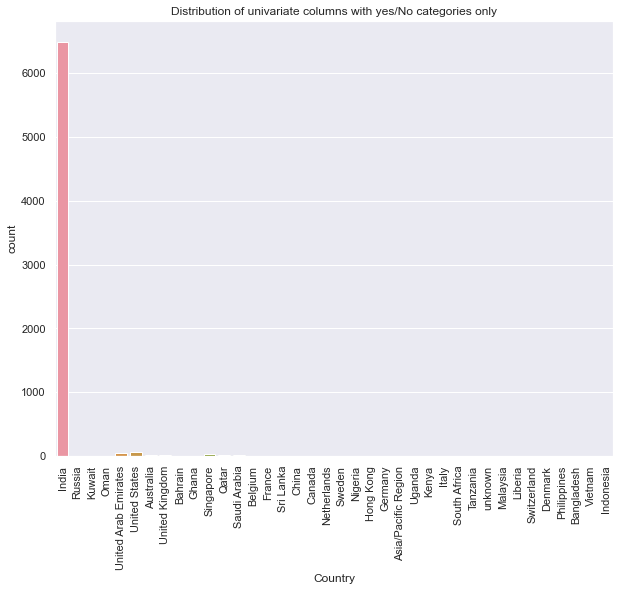

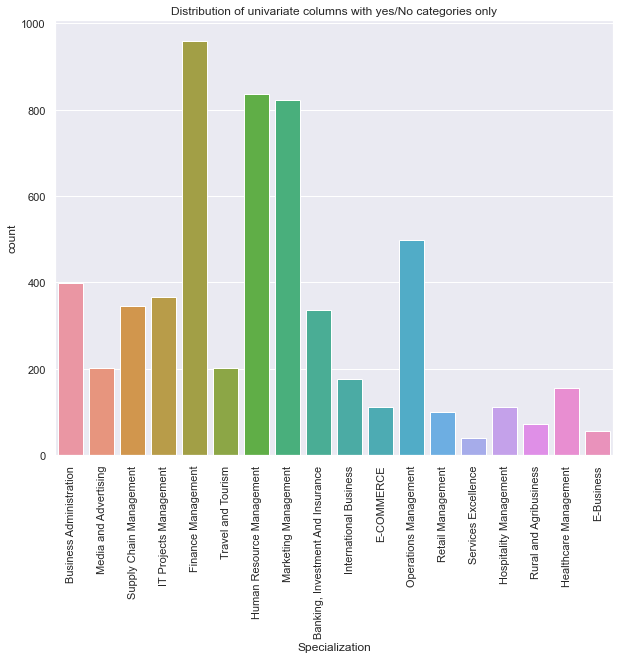

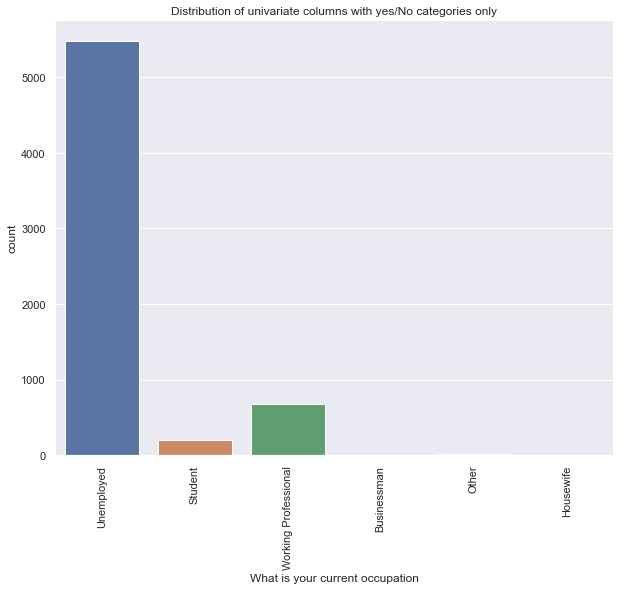

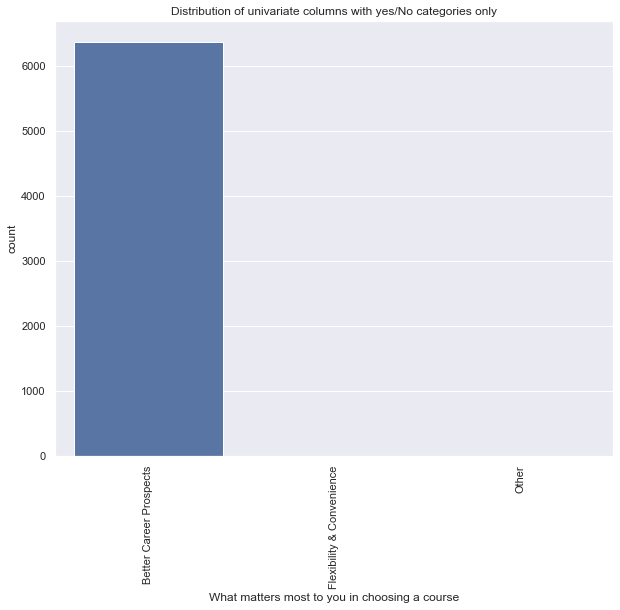

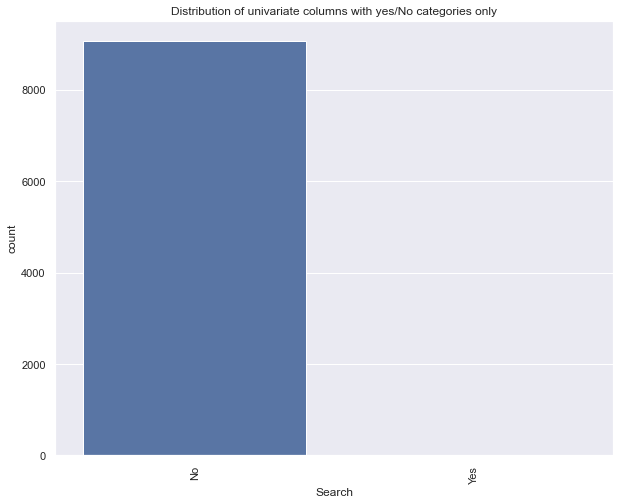

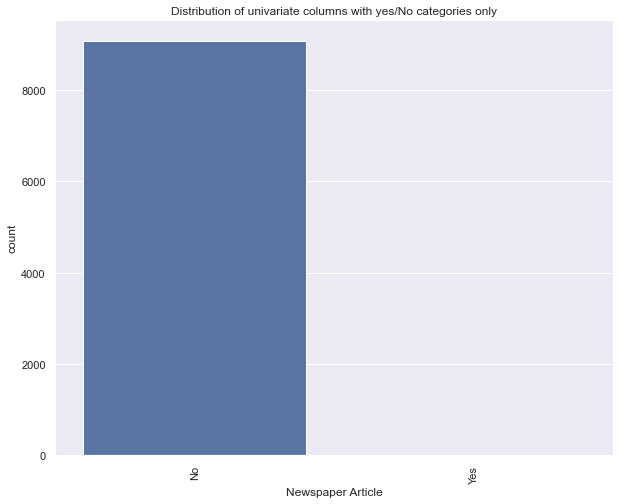

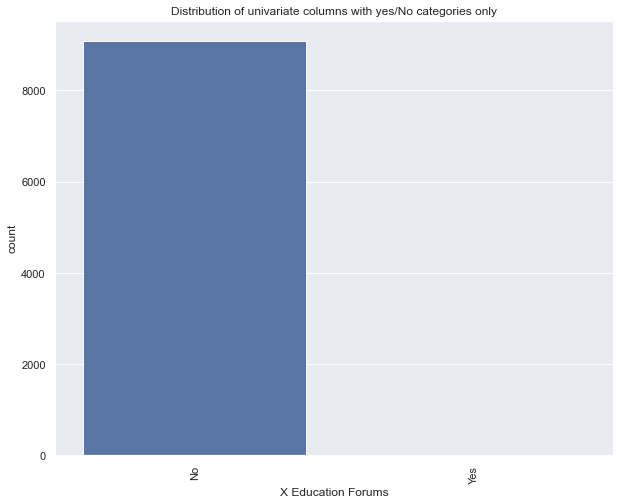

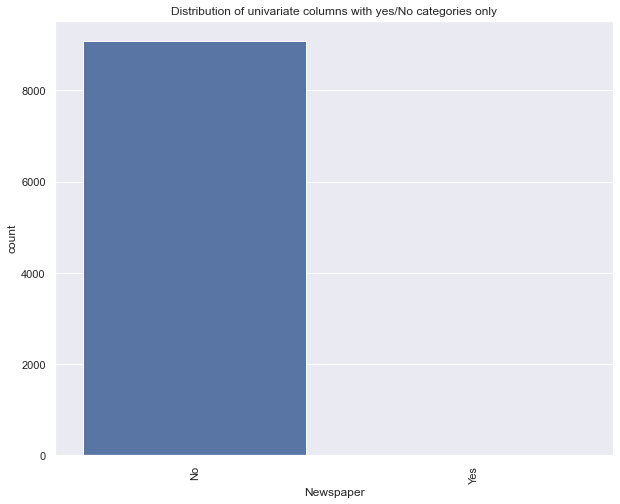

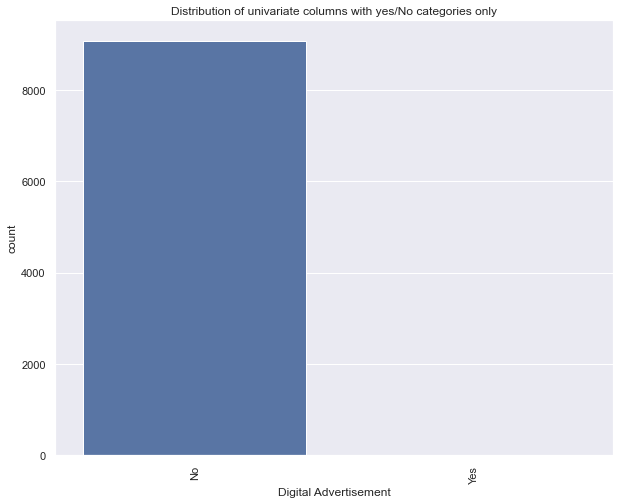

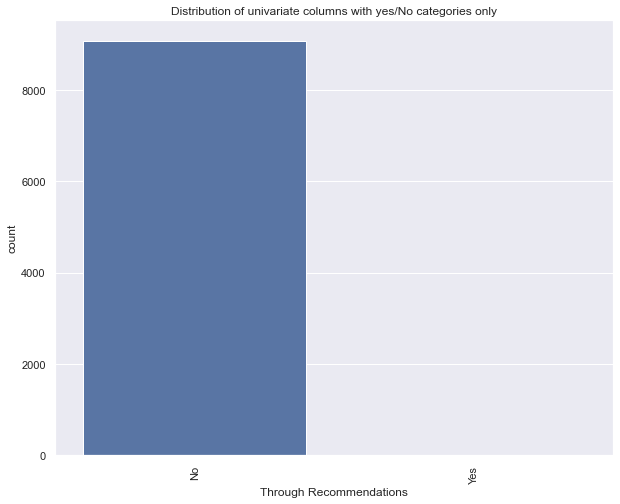

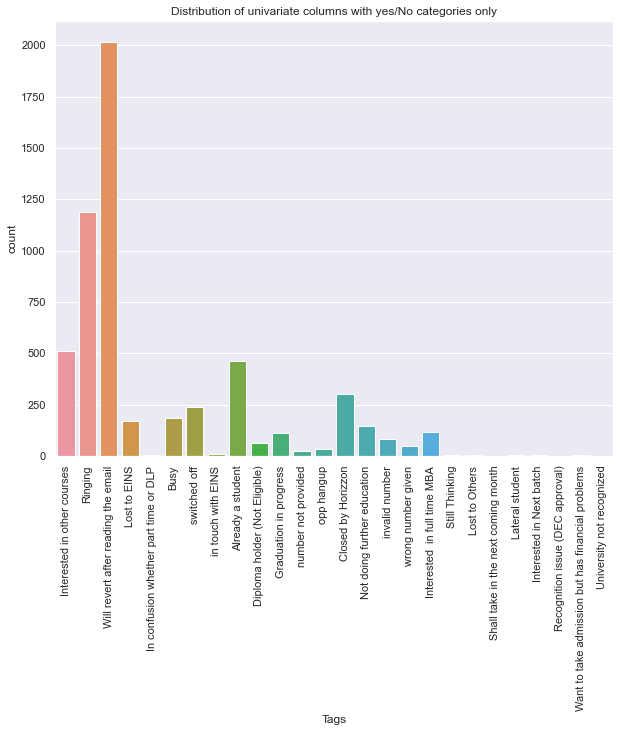

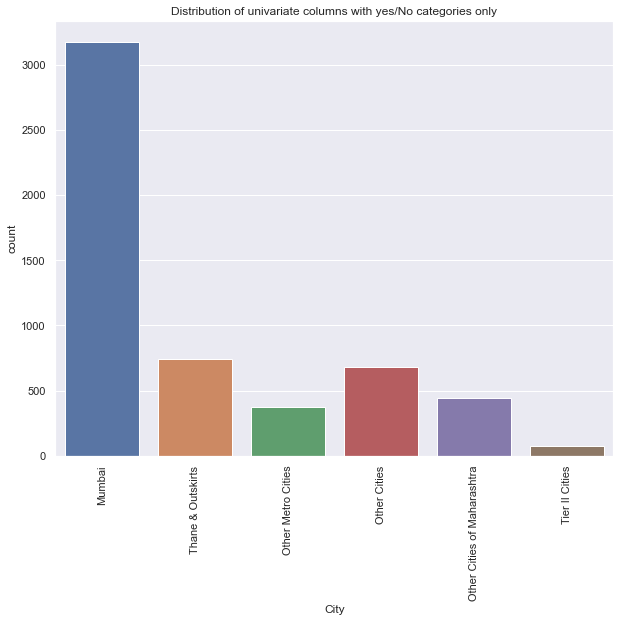

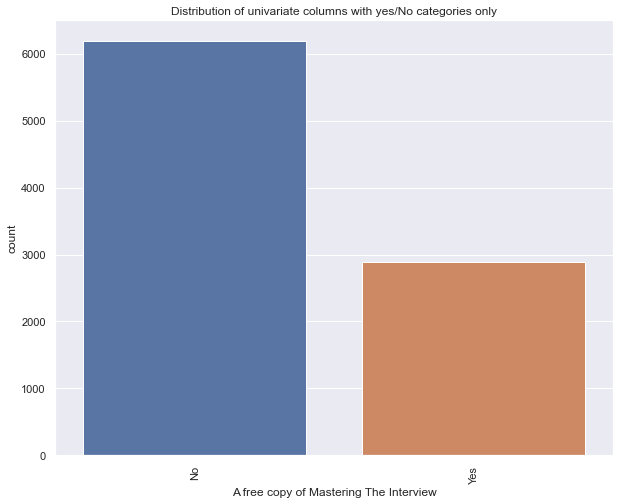

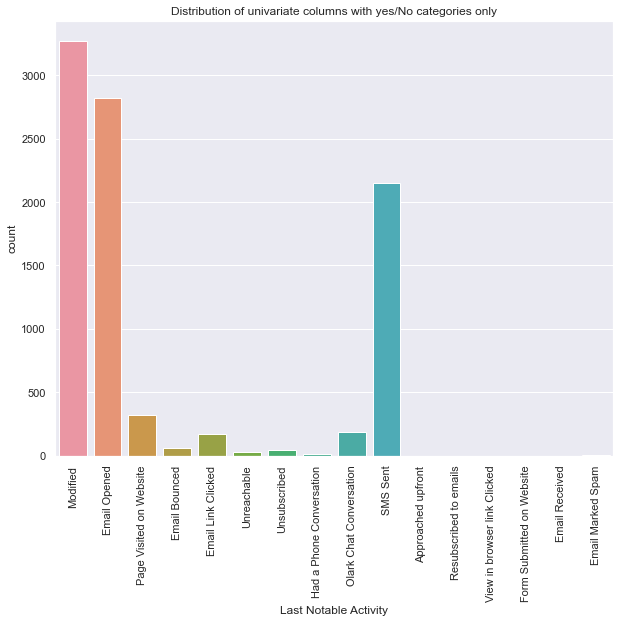

In [1332]:
##### categorical columns analysis.
for i in (enumerate(categorical_columns)):
    plt.figure(figsize=(10,8))
    sns.countplot(x=i[1],data=final_lead_dataset)    
    plt.title("Distribution of univariate columns with yes/No categories only")
    plt.xticks(rotation=90)
    plt.show()

#### Insights:
1. Since Most of the yes/No columns have only One category(>90%), the column value does not significantly affect the target column Converted.
2. So Eliminating these columns("Do Not Call","Country","Search","What matters most to you in choosing a course","Newspaper Article","X Education Forums","Newspaper","Digital Advertisement","Through Recommendations") from the original dataset.

In [1333]:
##### eliminated above columns because most of the columns contains only one category data.
final_lead_dataset.drop(columns=["Do Not Call","Country","Search","What matters most to you in choosing a course","Newspaper Article","X Education Forums","Newspaper","Digital Advertisement","Through Recommendations"],inplace=True)

In [1334]:
def univariate_barchart(df,column_name,title,threshold):  
    """
    This function will be useful for plotting the univariate bar chart distribution for every column.
    Parameter(s):
        ------------
            df : DataFrame it contains the info of the application dataset/previous application dataset.
            column_name: column name
            title :  Title for the graph.
            threshold : eliminate bar chart percentages if it is less than the threshold.
            Return(s):
            ---------
                print the barplot graph with the percentages.           
    """    
    df = df.groupby(column_name).agg({column_name:"count"})
    df["total_sum"] = df[column_name].sum()
    df["percentage"] = (df[column_name]/df["total_sum"])*100
    df = df.rename(columns={column_name:"individual_count"}).reset_index()
    df = df[df["percentage"]>threshold].reset_index(drop=True)
    
    bar,(ax1) = plt.subplots(1,1,figsize=(10,6))
    sns.barplot(x=column_name, y='percentage', data=df, ci=None, palette="muted",orient='v',ax=ax1,dodge=False)
    ax1.set_title(title, fontsize=15)
    ax1.set_xlabel ("Distribution of "+ column_name + "Variable")
    ax1.set_ylabel ("Percentage Of "+ column_name + "Variable")
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="right",fontsize = 12)

    # calculate the percentages and annotate the sns barplot
    for rect in ax1.patches:
        ax1.text (rect.get_x() + rect.get_width() / 2,rect.get_height(),"%.1f%%"% rect.get_height(), weight='bold' )

#### Distribution for Lead Origin:

In [1335]:
##### check the value counts for the data
final_lead_dataset['Lead Origin'].value_counts(dropna=False)

Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: Lead Origin, dtype: int64

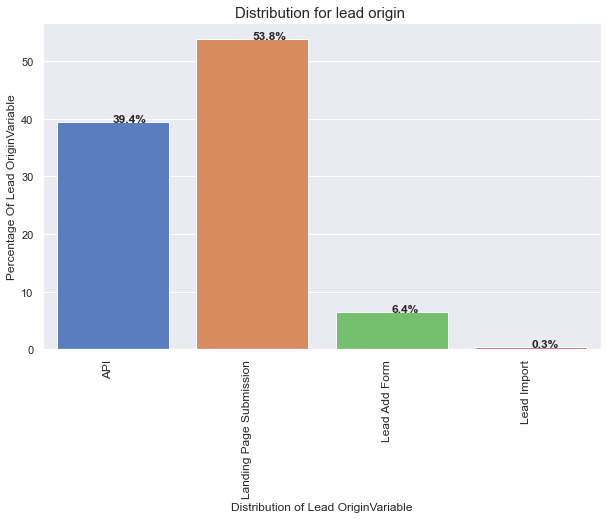

In [1336]:
##### check the percentage for the lead origin with respective to overall dataset.
univariate_barchart(final_lead_dataset,"Lead Origin","Distribution for lead origin ",0.0)

### Insights:

1. More than 90% of the data is through 2 lead origins only - API based on Landing Page submission.
2. The remaining 2 category values make up about 7% - but they could still be significant in their impact on Converted, these values will be retained. 
3. It is also important to understand how this 90% data plays a role w.r.t values of the target variable Converted. We shall look at this next.  

#### Distribution for lead origin with respective to target variable:

In [1337]:
def univariate_target_variable(df,column_name,target_variable,title):
    """
    This function will be helpful to plot the data with respect to target variable.
    Parameters : 
       df: dataframe for plotting
       column_name : column to plot the values
       target_variable: target variable
       title: title for the graph
      
    """
    plt.figure(figsize=(10,5))
    plot_univariate_target=sns.countplot(final_lead_dataset[column_name], hue=final_lead_dataset[target_variable])
    plot_univariate_target.set_xticklabels(plot_univariate_target.get_xticklabels(),rotation=90)
    plot_univariate_target.set_title(title, fontsize=15)
    plt.show()

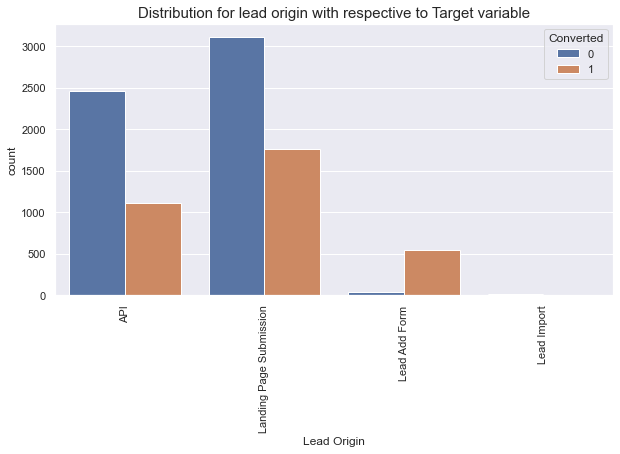

In [1338]:
###### plot the lead origin dataset with respective to target variable
univariate_target_variable(final_lead_dataset,"Lead Origin","Converted","Distribution for lead origin with respective to Target variable")

### Insights:

1. While API and Landing page submission have more data (93% data across the dataset), only about 50% of those convert. 
2. Contrary to these, the Lead Add form, contributing to only 6% data set across the dataset, converts more than 80% of those. 
3. The Lead Add form could be a potential focus area to spend more efforts on, and convert more prospects successfully. 

#### Lead Source:

In [1339]:
#### check for missing values and no.of.unique values
final_lead_dataset['Lead Source'].value_counts(dropna=False, normalize=True)*100

Google               31.606789
Direct Traffic       28.025127
Olark Chat           19.318933
Organic Search       12.717655
Reference             4.882081
Welingak Website      1.421644
Referral Sites        1.377562
Facebook              0.341635
bing                  0.066123
google                0.055102
Click2call            0.044082
Live Chat             0.022041
Press_Release         0.022041
Social Media          0.022041
testone               0.011020
WeLearn               0.011020
youtubechannel        0.011020
NC_EDM                0.011020
welearnblog_Home      0.011020
Pay per Click Ads     0.011020
blog                  0.011020
Name: Lead Source, dtype: float64

#### Insights related to lead source:
1. Since there are so many categories, need to map few categories into others..!!
2. For the above % distribution, categories < 0.3% are being consolidated as Others

In [1340]:
##### replace google with Google 
final_lead_dataset['Lead Source'] = final_lead_dataset['Lead Source'].replace('google','Google')
##### replace facebook as social media
final_lead_dataset['Lead Source'] = final_lead_dataset['Lead Source'].replace('Facebook','Social Media')
##### replacing blogs , press releases,advertisements and channels through the others categories.
final_lead_dataset['Lead Source'] = final_lead_dataset['Lead Source'].replace(['bing','click2call','press_release',
                                                     'youtubechannel','welearnblog_home',
                                                     'welearn','blog','Pay per Click Ads',
                                                    'testone','nc_edm'] ,'Others') 

#### Distribution for Lead source:

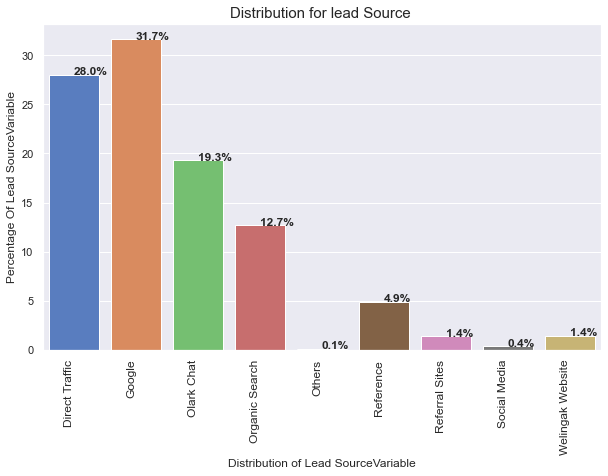

In [1341]:
###### categorical percentage distribution for lead source.
univariate_barchart(final_lead_dataset,"Lead Source","Distribution for lead Source ",0.1)

#### Insights:

1. 4 Categories - Direct Traffic, Google, Olark Chat and Organic Search make up for more 90% of the dataset. 
2. Categories clubbed into Others make up only 0.1% of the total dataset. 
3. We will retain the remaining values which make up approx 10%. These will be evaluated against the target variable Converted.

#### Distribution for lead source with respect to target variable:

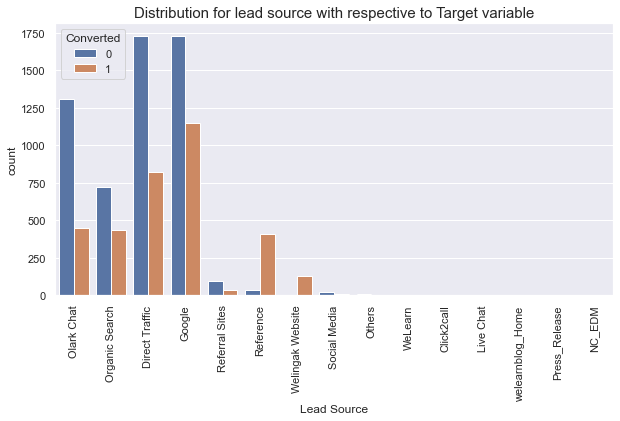

In [1342]:
###### categorical lead source distribution with respective to target variable.
univariate_target_variable(final_lead_dataset,"Lead Source","Converted","Distribution for lead source with respective to Target variable")

#### Insights: 

1. Of the 4 categories contributing to 90% in the dataset, Organic Search and Google look to have a relatively higher conversion ratio.
2. Reference and Welingak Website, while <10% of cases, seem to have a very strong conversion rate. These should be focused on more.   
3. Olark Chat and Direct Traffic has a lot of prospects but conversion ratios are about 30% and 50% respectively. This could still be utilized when the company wants to go aggressive.

#### Do Not Email: 

In [1343]:
#### check for missing values and no.of.unique values in do not email
final_lead_dataset['Do Not Email'].value_counts(dropna=False)

No     8358
Yes     716
Name: Do Not Email, dtype: int64

#### Distribution for Do not Email:

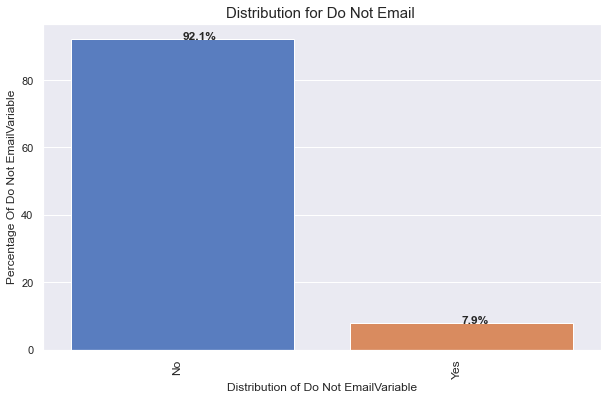

In [1344]:
##### categorical percentage distribution for do not email
univariate_barchart(final_lead_dataset,"Do Not Email","Distribution for Do Not Email ",0.1)

#### Insights:

- The field name is Do Not Email. Here, YES would indicate selecton. 8% are not interested in receiving emails. Almost 92% of the users want an email related to the course.

#### Distribution for Do not Email with respect to target variable:

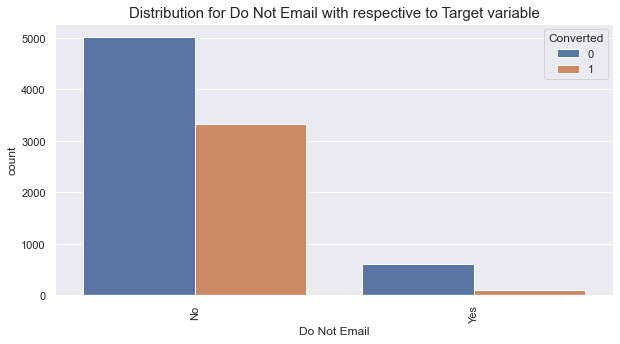

In [1345]:
##### Categorical percentage distribution for do not email with respective to target variable.
univariate_target_variable(final_lead_dataset,"Do Not Email","Converted","Distribution for Do Not Email with respective to Target variable")

#### Insights:

1. With users choosing to receive email, the % of conversion is approx 70%. This is a good focus area for conversion.
2. Additionally where users do not want to receive email, the % of conversion is low but still significant. In times of aggressive marketing and conversion, this should be picked up.

#### Last Activity:

In [1346]:
#### check for missing values and no.of.unique values in last activity.
final_lead_dataset['Last Activity'].value_counts(dropna=False)

Email Opened                    3432
SMS Sent                        2716
Olark Chat Conversation          972
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    312
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       90
Unsubscribed                      59
Had a Phone Conversation          25
View in browser link Clicked       6
Approached upfront                 5
Email Marked Spam                  2
Email Received                     2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [1347]:

##### replace low frequency count values with others because we have less percentage of values.
final_lead_dataset['Last Activity'] = final_lead_dataset['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                        'Had a Phone Conversation', 
                                                        'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')


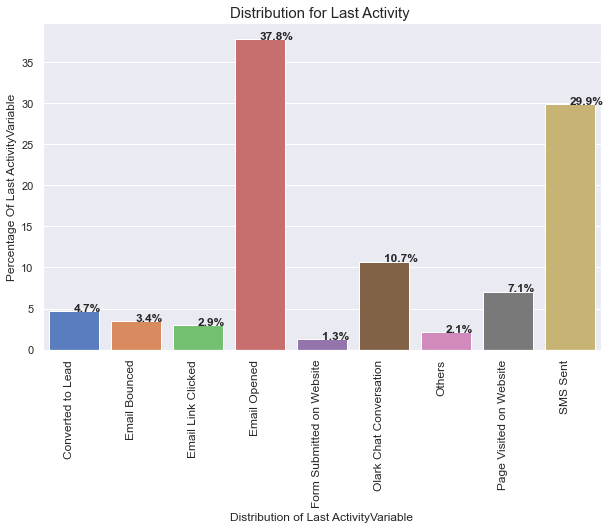

In [1348]:
###### Categorical distribution for last activity.
univariate_barchart(final_lead_dataset,"Last Activity","Distribution for Last Activity ",0.1)

#### Insights:

1. SMS Sent, Email Opened and Olark Chat Conversation together make up for about 70% of the dataset.
2. Others as a category (made up of smaller value categories) accounts for only 2% of the data.
3. Other instances of Last Activity - are smaller overall about 15-20% however will need to evaluate these using the Converted values to check how significant these are. 

#### Distribution for Last Activity respect to target variable:

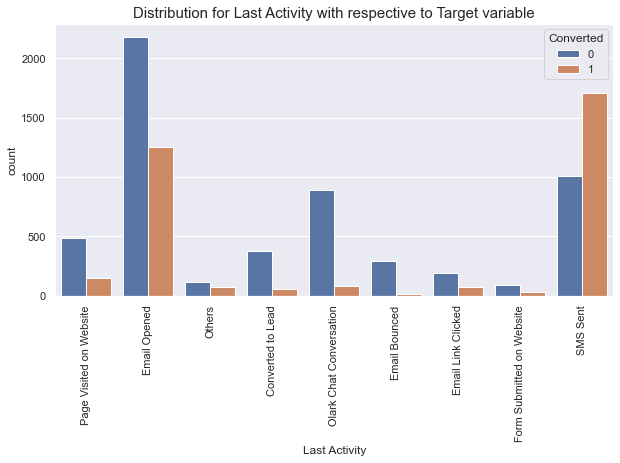

In [1349]:
#### distribution for target variable with respective to last activity.
univariate_target_variable(final_lead_dataset,"Last Activity","Converted","Distribution for Last Activity with respective to Target variable")

#### Insights:

1. SMS Sent has a huge conversion ratio. Even though it contributes to only 30% prospects, its conversion rate is the best. This shows that more push strategy should be leveraged, since it has higher conversion opportunity. 
2. Olark Chat Conversation, while having about 10% of prospects, has very low conversion rate - as also confirmed from Lead Source insights. 
3. Email Opened while has much lower contribution to dataset, but has relative higher conversion ratios of almost 60-65%. Sending emails should also be leveraged more instead of focusing on Olark Chat etc.

#### Last Notable Activity:

In [1350]:
#### check for missing values in last notable activity and check unique categories in notable activity.
final_lead_dataset['Last Notable Activity'].value_counts(dropna=False)

Modified                        3267
Email Opened                    2823
SMS Sent                        2152
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      45
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Form Submitted on Website          1
Email Received                     1
View in browser link Clicked       1
Resubscribed to emails             1
Name: Last Notable Activity, dtype: int64

In [1351]:
##### replace low frequency categories with other notable activity becaause we can see less value counts.
final_lead_dataset['Last Notable Activity'] = final_lead_dataset['Last Notable Activity'].replace(['Had a Phone Conversation',
                                                                       'Email Marked Spam',
                                                                         'Unreachable',
                                                                         'Unsubscribed',
                                                                         'Email Bounced',                                                                    
                                                                       'Resubscribed to emails',
                                                                       'View in browser link Clicked',
                                                                       'Approached upfront', 
                                                                       'Form Submitted on Website', 
                                                                       'Email Received'],'Other_Notable_activity')

### Distribution for last Notable Activity:

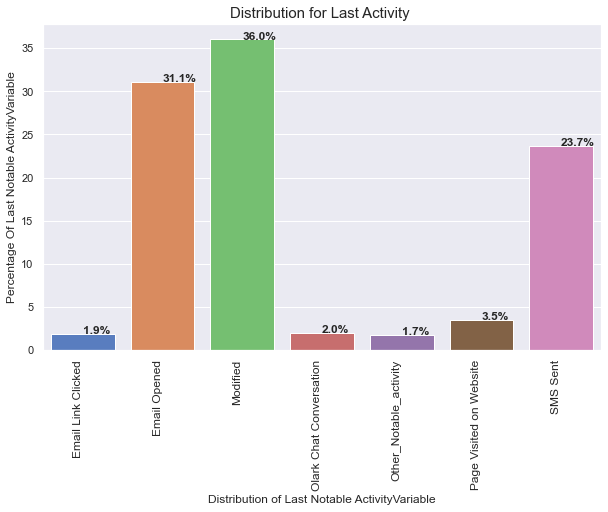

In [1352]:
##### categorical distribution for last notable activity.
univariate_barchart(final_lead_dataset,"Last Notable Activity","Distribution for Last Activity ",0.1)

### Insights:

1. Email Opened, SMS Sent and Modified make up for 90% of the prospects. 
2. However Modified, which makes up 36% of the total, is not very self explanatory as to the exact action that was performed. This will make it difficult to be leveraged as a focus area. 
3. Other activities, though smaller sections of the pie, however - we will check distribution against Converted variable to see how they affect the conversion.

### Distribution of Last Notable Activity with respective to target variable:

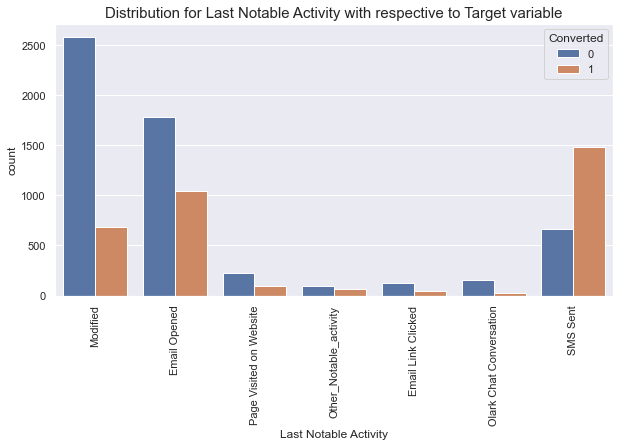

In [1353]:
##### distribution for last notable acitvity with respective to target variable converted.
univariate_target_variable(final_lead_dataset,"Last Notable Activity","Converted","Distribution for Last Notable Activity with respective to Target variable")

### Insights:

1. As also evidenced above, SMS sent continues to be a strong approach to converting prospects into customers and should be heavily leveraged. 
2. Email Opened is also a good contender and should be given more focus. 
3. Modified is low on conversion, but also not very clear on what gets included here. This should be expanded to include further detail and exact activities - which might then influence the conversion depending on specific activity. 
4. Page Visited from Website, Email Link clicked are more pull operations that perform decent conversion but are more user  dependent and less on control of company.

#### Specialization:

In [1354]:
##### check for missing values percentages and unique categories in specialization.
final_lead_dataset['Specialization'].value_counts(dropna=False)

NaN                                  3282
Finance Management                    959
Human Resource Management             837
Marketing Management                  823
Operations Management                 499
Business Administration               399
IT Projects Management                366
Supply Chain Management               346
Banking, Investment And Insurance     335
Media and Advertising                 202
Travel and Tourism                    202
International Business                176
Healthcare Management                 156
Hospitality Management                111
E-COMMERCE                            111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [1355]:
# Lead may not have mentioned specialization because it was not in the list or maybe they are a students  and don't have a specialization yet. So we will replace NaN values here with 'Not Specified'
final_lead_dataset["Specialization"] = final_lead_dataset["Specialization"].fillna("Not Specified")

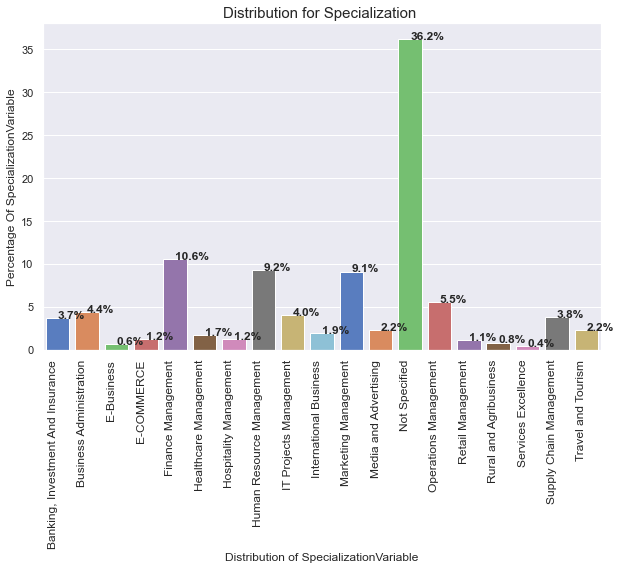

In [1356]:
##### categorical distribution for last notable activity.

univariate_barchart(final_lead_dataset,"Specialization","Distribution for Specialization ",0.1)

In [1357]:
#### replacing low frequency and various management specializations into management specializations.
final_lead_dataset['Specialization'] = final_lead_dataset['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Management_Specializations')  

#### Distribution for Specialization:

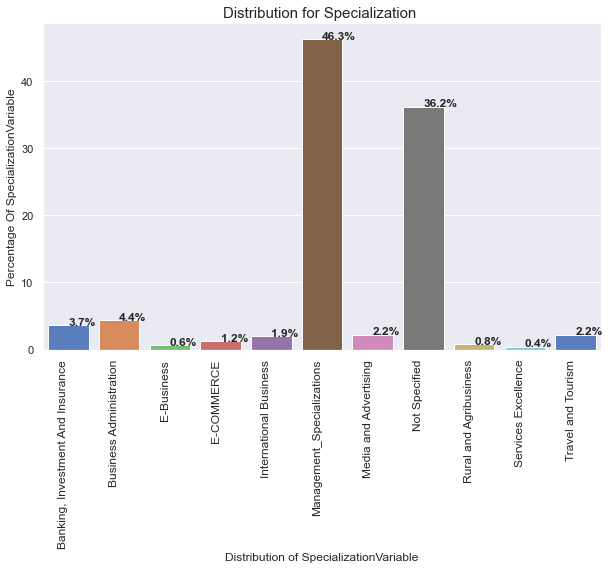

In [1358]:
##### categorical distribution for last notable activity.
univariate_barchart(final_lead_dataset,"Specialization","Distribution for Specialization ",0.1)

#### Insights:

1. 'Not specified' and management specializations unfortunately, together, make up for the bulk of the dataset.
2. Conversion rate is also pretty high for Management specializations - about 75-80%. This is a huge opportunity.

#### Distribution for Specialization with respective to Converted Target Variable:

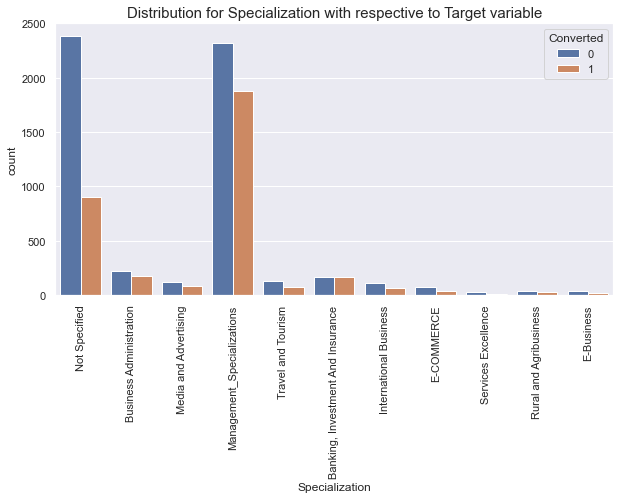

In [1359]:
univariate_target_variable(final_lead_dataset,"Specialization","Converted","Distribution for Specialization with respective to Target variable")

### Insights:

1. Management specialization individuals have a very strong ~ 75-80% conversion ratio. This should be capitalized on. 
2. While individuals from 'Business Administration', 'Banking, Investment and Insurance', and 'Media and Advertising' are less represented in the dataset, their conversion ratio seems to be high. These individuals should be aggressively followed up on as prospects. 

#### Current Occupation: 

In [1360]:
##### check the unique values in current occupation and missing values count in current occupation.
final_lead_dataset['What is your current occupation'].value_counts(dropna=False)

Unemployed              5476
NaN                     2683
Working Professional     677
Student                  206
Other                     15
Housewife                  9
Businessman                8
Name: What is your current occupation, dtype: int64

In [1361]:
#imputing Nan values with mode "Unemployed"

final_lead_dataset['What is your current occupation'] = final_lead_dataset['What is your current occupation'].replace(np.nan, 'Unemployed')

#### Distribution for current occupation:

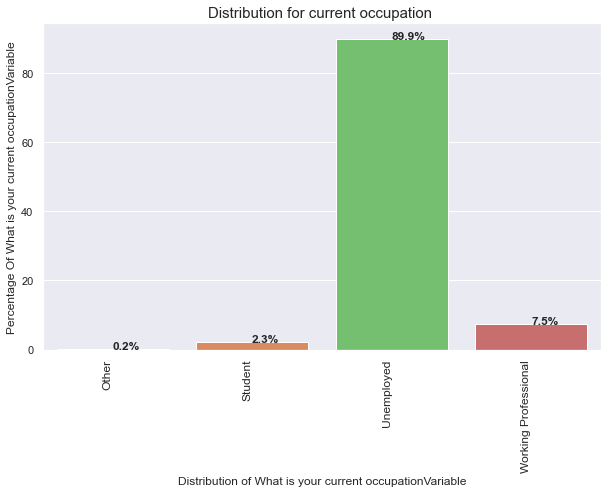

In [1362]:
#### distribution for current occupation for various categories.
univariate_barchart(final_lead_dataset,"What is your current occupation","Distribution for current occupation ",0.1)

### Insights:

1. The bulk of the individuals that X Education is being marketed to are mostly unemployed individuals.
2. However, working professionals also figure, though quite less in number.
3. Students and other categories are negligible.

### Distribution for current occupation with respective to target variable:

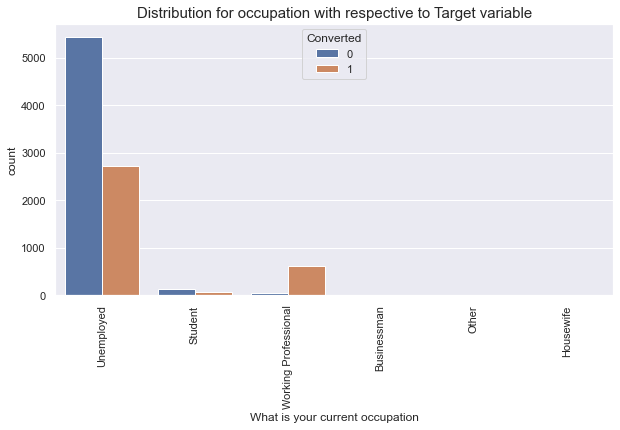

In [1363]:
#### plot the categorical distribution for target variable.
univariate_target_variable(final_lead_dataset,"What is your current occupation","Converted","Distribution for occupation with respective to Target variable")

#### Insights:

1. The highest conversion ratio here is for working professionals. Even though they're less in number within the dataset. This shows that marketing needs to attract more working professionals to increase their revenue through conversion.
2. The chances of conversion within unemployed seem to only be about 50% 
3. More focus should be spent on working individuals as number of conversions is easily 4-5 times that of not converted.  

#### Tags:

In [1364]:
##### check the missing values in tags and unique categories in tags columns.
final_lead_dataset['Tags'].value_counts(dropna=False)

NaN                                                  3327
Will revert after reading the email                  2016
Ringing                                              1187
Interested in other courses                           509
Already a student                                     465
Closed by Horizzon                                    301
switched off                                          240
Busy                                                  185
Lost to EINS                                          172
Not doing further education                           145
Interested  in full time MBA                          116
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    25
in touch with 

In [1365]:
#### imputing tags misisng values with not specified because user did not select any tags while filling the form.
final_lead_dataset['Tags'] = final_lead_dataset['Tags'].replace(np.nan,'Not Specified')


### Distribution for Tags:

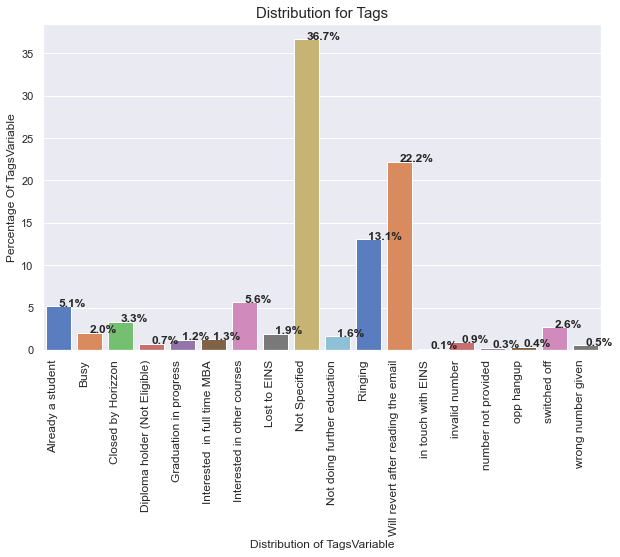

In [1366]:
univariate_barchart(final_lead_dataset,"Tags","Distribution for Tags",0.1)

In [1367]:
#replacing tags with low frequency with "Other Tags"
final_lead_dataset['Tags'] = final_lead_dataset['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

final_lead_dataset['Tags'] = final_lead_dataset['Tags'].replace(['switched off',
                                      'Already a student',
                                       'Not doing further education',
                                       'invalid number',
                                       'wrong number given',
                                       'Interested  in full time MBA'] , 'Other_Tags')

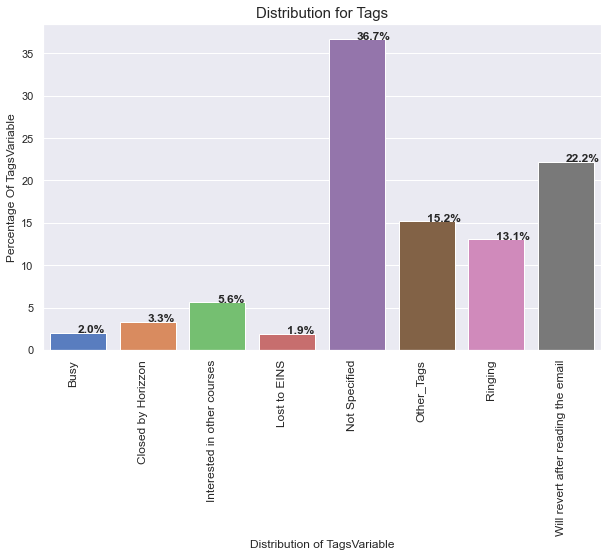

In [1368]:
##### categorical distribution for tags columns.
univariate_barchart(final_lead_dataset,"Tags","Distribution for Tags",0)

### Insights:

1. 'Not Specified' unfortunately forms a major portion of the dataset. It is difficult to focus on a specific strategy if the tag itself is not specified. 
2. 'Will revert after reading the email' is a close contender with 22% of the share. 
3. Several other smaller categories have been clubbed as Other - this forms about 15% of the data. 

### Distribution for Tags with respective to target variable:

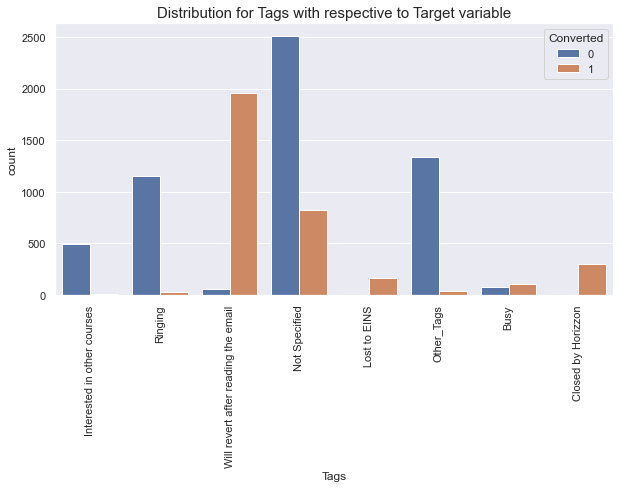

In [1369]:
#### distribution for tags variable with respective to target variable.
univariate_target_variable(final_lead_dataset,"Tags","Converted","Distribution for Tags with respective to Target variable")

### Insights:

1. Not specified though forming a major portion of the dataset, falls low in conversion - only about 30-40% converting.
2. In contrast, however, email recipients who mark as 'Will revert after reading the email' have converted far more. 
3. More focus and marketing efforts to be spent on email activities and following up through email - even call ringing does not convert as effectively.

### City:

In [1370]:
#### check the misisng values percentages in city and various cities in city column.
final_lead_dataset['City'].value_counts(dropna=False)

NaN                            3575
Mumbai                         3177
Thane & Outskirts               745
Other Cities                    680
Other Cities of Maharashtra     446
Other Metro Cities              377
Tier II Cities                   74
Name: City, dtype: int64

In [1371]:
#### imputing missing values with city because mumbai is the most frequent one.
final_lead_dataset['City'] = final_lead_dataset['City'].replace(np.nan,'Mumbai')


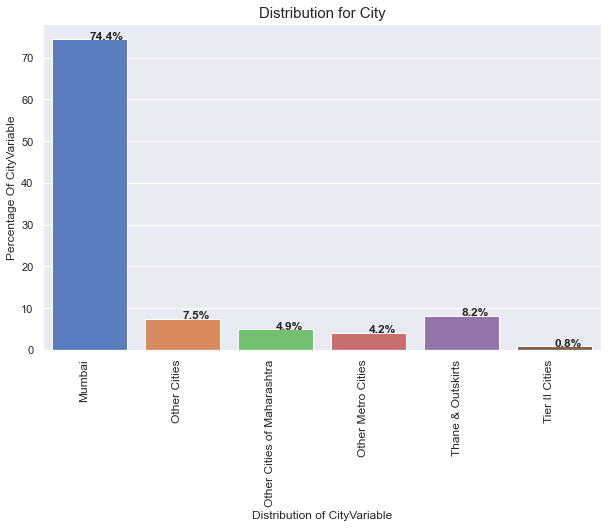

In [1372]:
#### Distribution for city column
univariate_barchart(final_lead_dataset,"City","Distribution for City",0)

### Insights:

1. Maximum data is available for individuals from Mumbai, Thane and outskirts
2. Tier II cities and other Metro cities, and other cities are much lesser in representation. 
3. Other cities of Maharashtra is also a considerable number following other cities. 
4. This indicates that most of the data being focused upon for the training model pertains to mostly Maharashtra state of India, and specifically Mumbai with neighbouring areas. 

### Distribution for city with respective to target variable:

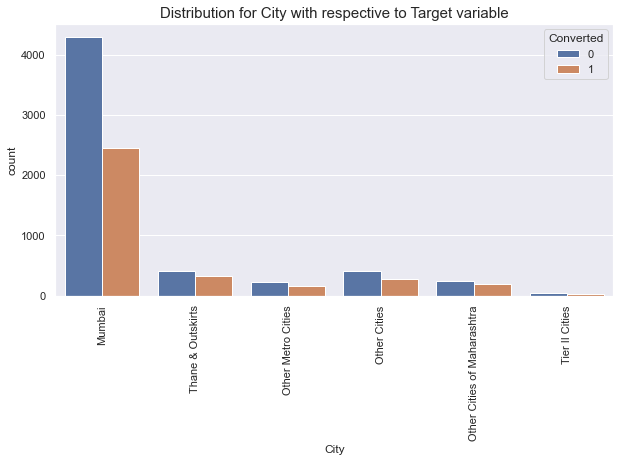

In [1373]:
#### distribution for city with respective to target variable.
univariate_target_variable(final_lead_dataset,"City","Converted","Distribution for City with respective to Target variable")

#### Insights:

1. While representation is maximum for Mumbai, conversion is only about 30-40%. 
2. Instead, Thane and outskirts, though relatively lower in comparison, have a much higher conversion. This is an opportunity. 
3. Other cities of Maharashtra and other cities overall also have a good conversion ratio. 
4. It is worth exploring if marketing efforts when increased here, lead to stronger conversions. 

#### Numerical analysis:

In [1374]:
sns.set(style="darkgrid")

def boxplot(df,column_name,title):
    """
    This function will be useful for plotting the boxplot to check the outliers.
    Parameter(s):
        ------------
            df : dataframe it contains the application dataset info.
            column_name :  name of the column to plot the boxplot
            title : Title fot graph
            Return(s):
            ---------
                print the boxplot and statistical summary.  
    """
    
    print(" Statistical Summary :\n",df[column_name].describe())
    #### plot the figure size
    plt.figure(figsize = (25,5))
    #### create a boxplot using sns.
    sns.boxplot(x=df[column_name])
    plt.title(title, fontsize = 20 )
    plt.show()
    
    #### calculate first quartile, third quartile and inter quartile range for outliers.
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = (Q1 - 1.5 * IQR)
    upper_whisker = (Q3 + 1.5 * IQR)
    employed_max = df[column_name].max()
    
    #### boxplot with respective to target variable converted.
    sns.boxplot(y=df[column_name],x=df["Converted"])


 Statistical Summary :
 count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64


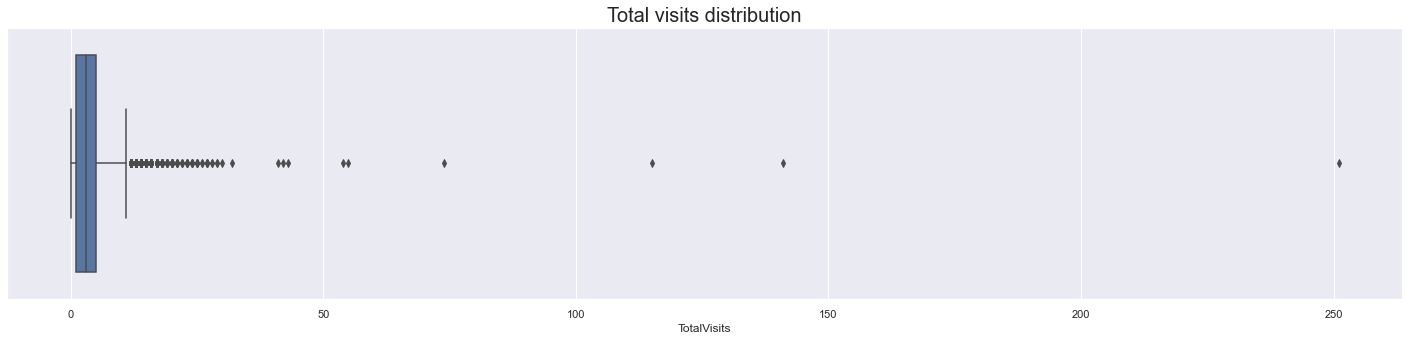

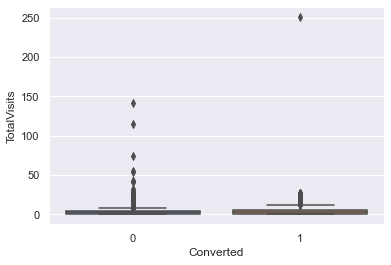

In [1375]:
##### boxplot for the lead dataset 
boxplot(final_lead_dataset,"TotalVisits","Total visits distribution")

#### Insights: 

1. On the whole, 75% of the data lies within 5 total visits to the website. 
2. However, there are quite a few outliers ranging from 5-50 and then some intermittent ones until 251.
3. We could do outlier treatment, however in business terms, individuals can have 250 visits to the website. This could be a true case. Hence, not removing the outliers.
4. Also, when split by converted versus non-converted - the TotalVisits values are aligned to what was plotted overall.
5. The individual with 251 visits is a Converted prospect, so this could very well be a real number. Apart from 251, for converted prospects, outliers are very few. 
6. For non-converted prospects, there are quite a few outliers from 5 until 150 but these could be genuine - hence no specific outlier treatment will be performed.

#### Total time spent on website:

 Statistical Summary :
 count    9074.000000
mean      482.887481
std       545.256560
min         0.000000
25%        11.000000
50%       246.000000
75%       922.750000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64


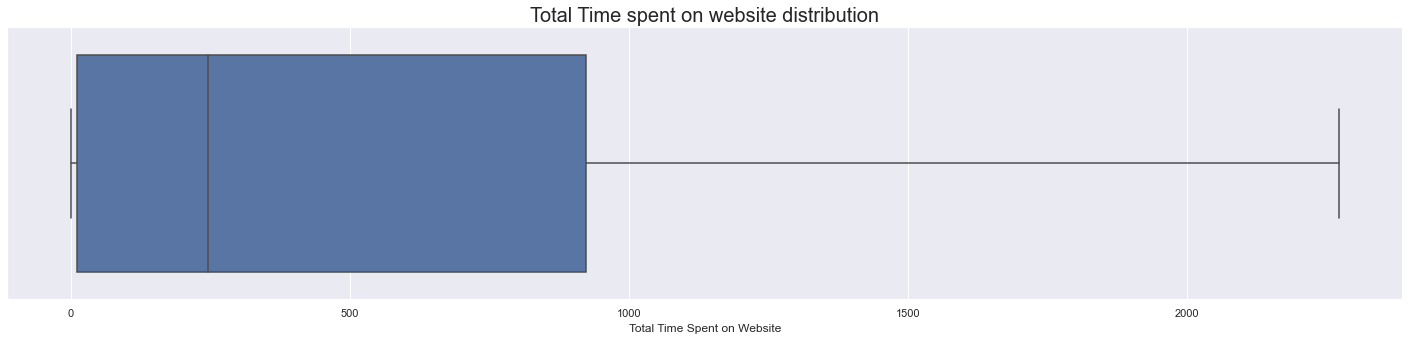

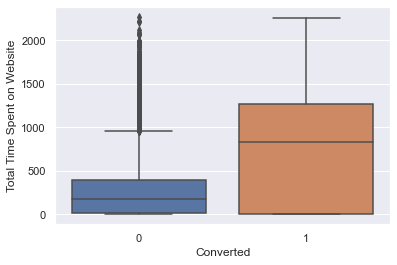

In [1376]:
##### total time spent on the website and distribution.
boxplot(final_lead_dataset,"Total Time Spent on Website","Total Time spent on website distribution")

#### Insights: 

1. The total time spent by most customers on the website is about 922 (assuming this is seconds - the data dictionary does not specify. For the purposes of documentation, we shall indicate this as 922 m where m stands for unit of measure. 
2. The median is around 246 m; whereas there's still certain individuals between 922 m and 2272 m. 
3. When split by converted and non-converted prospects, the median and 75 percentile is much higher for those who converted indicated that those who spent more time on the site have a higher probability of conversion.
4. In contrast, those who spent less time on the site have not converted. 

#### Page Views per visit:

 Statistical Summary :
 count    9074.000000
mean        2.370151
std         2.160871
min         0.000000
25%         1.000000
50%         2.000000
75%         3.200000
max        55.000000
Name: Page Views Per Visit, dtype: float64


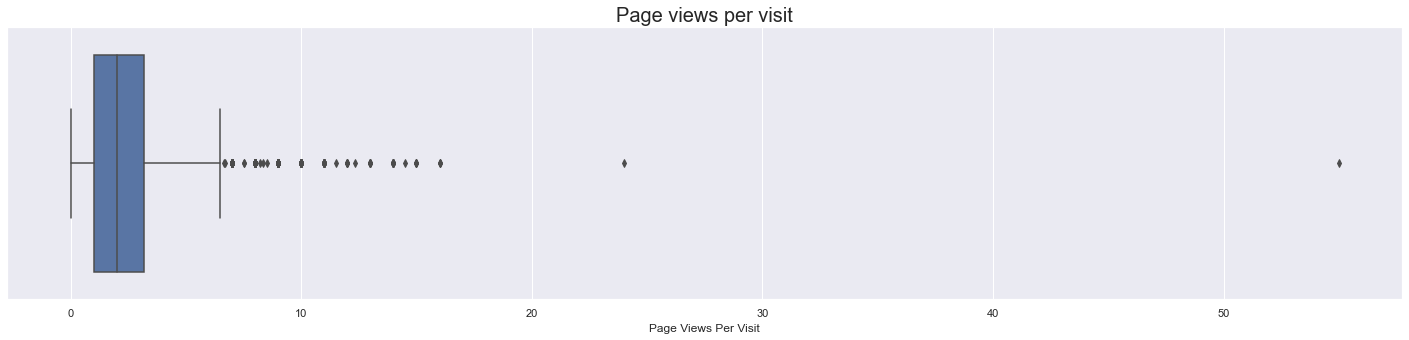

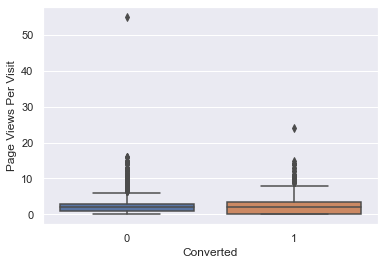

In [1377]:
##### page views per visit distribution
boxplot(final_lead_dataset,"Page Views Per Visit","Page views per visit")

#### Insights:

1. Typically it is observed that, individuals have about 0-3 views per visit.
2. However, there are quite a few outliers taking the max value to 55. 
3. Since this could also be a genuine case, hence outlier treatment will not be done - no eliminations will be performed. 
4. There is no major significant difference in the page per views between those of converted versus non converted, so this may not necessarily be a factor in conversion.

#### Numerical to Numerical Analysis: 

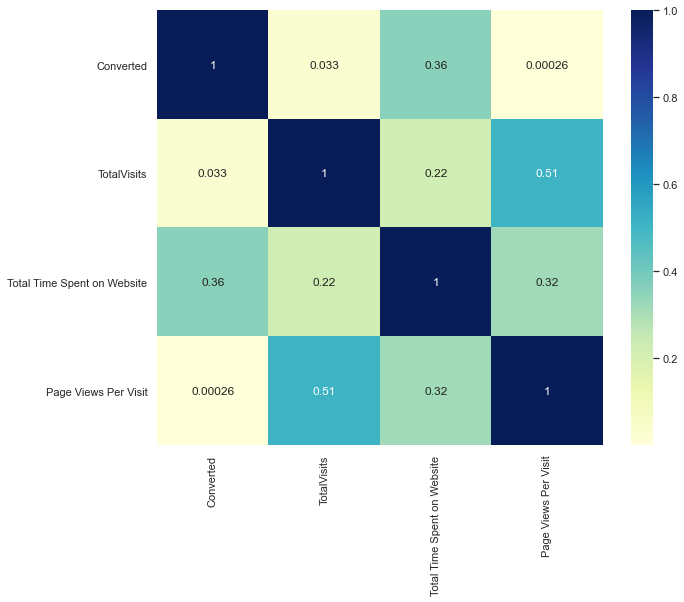

In [1378]:
#Checking correlations of numeric values
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(final_lead_dataset[["Converted","TotalVisits","Total Time Spent on Website","Page Views Per Visit"]].corr(), cmap="YlGnBu", annot=True)
plt.show()


#### Insights:

1. Of all the numerical variables, The 'Total Time Spent on Website' has the highest corelation with the target Converted - though it is less than 0.5 
2. The TotalVisits also has a moderate corelation with Page Views per Visit. 
3. There are no numeric variables which have a very strong corelation (positive or negative) with the target variable Corelated. Ideally, strong positive corelations are higher than 0.7. 

#### Dummy Variables Creation:

In [1379]:
#### first need to map yes/no type of categories into 1 and 0 columns

variables_to_map =  ['Do Not Email', 'A free copy of Mastering The Interview']

# Defining the map function
def binary_map_values(x):
    return x.map({'Yes': 1, "No": 0})

### apply the binary map values and map values dataset
final_lead_dataset[variables_to_map] = final_lead_dataset[variables_to_map].apply(binary_map_values)

In [1380]:
final_lead_dataset.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,Interested in other courses,Mumbai,0,Modified
1,660728,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,Ringing,Mumbai,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Ringing,Mumbai,0,Modified
4,660681,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,Will revert after reading the email,Mumbai,0,Modified


### Dummy variables creation:

In [1381]:
def dummy_variable_creation(dataset,column_name):
    """
    This function will be mainly helpful to create dummy variables and elimination.
    
    dataset : dataset name
    column name : column name to create dummy variables    
    """
    ##### create dummy variables and create columns as prefix_category column and drop status
    dummy = pd.get_dummies(dataset[column_name], prefix  = column_name)
        
    #### concat the dummy variables with the original dataset and return it.
    leads = pd.concat([dataset, dummy], axis = 1)
    
    return leads

#### lead source dummy variables:

In [1382]:
##### dummy variables for lead source 
final_lead_dataset = dummy_variable_creation(final_lead_dataset,"Lead Source")

In [1383]:
### eliminate lead source others and lead source we learn because no value for this in the model
final_lead_dataset.drop(columns=["Lead Source_Others","Lead Source_WeLearn"],axis=1,inplace=True)

In [1384]:
#### eliminate the original column from the dataset.
final_lead_dataset.drop(columns=["Lead Source"],axis=1,inplace=True)

In [1385]:
final_lead_dataset.head()

,Lead Number,Lead Origin,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Lead Source_welearnblog_Home
0,660737,API,0,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,Interested in other courses,Mumbai,0,Modified,0,0,0,0,0,1,0,0,0,0,0,0,0
1,660728,API,0,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,Ringing,Mumbai,0,Email Opened,0,0,0,0,0,0,1,0,0,0,0,0,0
2,660727,Landing Page Submission,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,1,Email Opened,0,1,0,0,0,0,0,0,0,0,0,0,0
3,660719,Landing Page Submission,0,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Ringing,Mumbai,0,Modified,0,1,0,0,0,0,0,0,0,0,0,0,0
4,660681,Landing Page Submission,0,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,Will revert after reading the email,Mumbai,0,Modified,0,0,1,0,0,0,0,0,0,0,0,0,0


#### Lead origin:

In [1386]:
#### create dummy variables for lead origin, current occupation and city columns.
final_lead_dataset = dummy_variable_creation(final_lead_dataset,['Lead Origin'])

In [1387]:
#### remove the original columns from the dataset.
final_lead_dataset.drop(columns=["Lead Origin"],inplace=True)

In [1388]:
final_lead_dataset.head()

,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Lead Source_welearnblog_Home,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import
0,660737,0,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,Interested in other courses,Mumbai,0,Modified,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
1,660728,0,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,Ringing,Mumbai,0,Email Opened,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2,660727,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,1,Email Opened,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,660719,0,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Ringing,Mumbai,0,Modified,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,660681,0,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,Will revert after reading the email,Mumbai,0,Modified,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0


### Dummy variables for city:

In [1389]:
final_lead_dataset = dummy_variable_creation(final_lead_dataset,['City'])

In [1390]:
#### remove the original columns from the dataset.
final_lead_dataset.drop(columns=["City"],inplace=True)

In [1391]:
final_lead_dataset.head()

,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,A free copy of Mastering The Interview,Last Notable Activity,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Lead Source_welearnblog_Home,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,660737,0,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,Interested in other courses,0,Modified,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
1,660728,0,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,Ringing,0,Email Opened,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,660727,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,1,Email Opened,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
3,660719,0,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Ringing,0,Modified,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
4,660681,0,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,Will revert after reading the email,0,Modified,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0


### Current Occupation:

In [1392]:
final_lead_dataset = dummy_variable_creation(final_lead_dataset,['What is your current occupation'])

In [1393]:
#### remove the original columns from the dataset.
final_lead_dataset.drop(columns=["What is your current occupation"],inplace=True)

In [1394]:
final_lead_dataset.head()

,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Tags,A free copy of Mastering The Interview,Last Notable Activity,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Lead Source_welearnblog_Home,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,660737,0,0,0.0,0,0.0,Page Visited on Website,Not Specified,Interested in other courses,0,Modified,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,660728,0,0,5.0,674,2.5,Email Opened,Not Specified,Ringing,0,Email Opened,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,660727,0,1,2.0,1532,2.0,Email Opened,Business Administration,Will revert after reading the email,1,Email Opened,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,660719,0,0,1.0,305,1.0,Others,Media and Advertising,Ringing,0,Modified,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4,660681,0,1,2.0,1428,1.0,Converted to Lead,Not Specified,Will revert after reading the email,0,Modified,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0


### Specialization:

In [1395]:
#### create dummy variables for specialization column.

final_lead_dataset = dummy_variable_creation(final_lead_dataset,['Specialization'])

In [1396]:
#### remove original specialization column from the dataset.
final_lead_dataset.drop(columns=["Specialization"],axis=1,inplace=True)

#### remove specialization not specified column from the original dataset because  it has low frequencies. 
final_lead_dataset.drop(columns=["Specialization_Not Specified"],axis=1,inplace=True)


In [1397]:
final_lead_dataset.head()

,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Tags,A free copy of Mastering The Interview,Last Notable Activity,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Lead Source_welearnblog_Home,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism
0,660737,0,0,0.0,0,0.0,Page Visited on Website,Interested in other courses,0,Modified,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,660728,0,0,5.0,674,2.5,Email Opened,Ringing,0,Email Opened,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,660727,0,1,2.0,1532,2.0,Email Opened,Will revert after reading the email,1,Email Opened,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
3,660719,0,0,1.0,305,1.0,Others,Ringing,0,Modified,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
4,660681,0,1,2.0,1428,1.0,Converted to Lead,Will revert after reading the email,0,Modified,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


#### Last Activity:

In [1398]:
#### create dummy variables for last activity
final_lead_dataset = dummy_variable_creation(final_lead_dataset,['Last Activity'])

In [1399]:
#### dropping the original column last activity column from the dataset.
final_lead_dataset.drop(columns=["Last Activity"],axis=1,inplace=True)

#### remove last activity others column from the dataset because it has low frequencies. 

final_lead_dataset.drop(columns=["Last Activity_Others"],axis=1,inplace=True)


In [1400]:
final_lead_dataset.head()

,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Tags,A free copy of Mastering The Interview,Last Notable Activity,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Lead Source_welearnblog_Home,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent
0,660737,0,0,0.0,0,0.0,Interested in other courses,0,Modified,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,660728,0,0,5.0,674,2.5,Ringing,0,Email Opened,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,660727,0,1,2.0,1532,2.0,Will revert after reading the email,1,Email Opened,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,660719,0,0,1.0,305,1.0,Ringing,0,Modified,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,660681,0,1,2.0,1428,1.0,Will revert after reading the email,0,Modified,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


#### Last Notable Activity:

In [1401]:
#### create dummy variables from the last notable activity 
final_lead_dataset = dummy_variable_creation(final_lead_dataset,['Last Notable Activity'])

In [1402]:
#### drop the original column last notable activity from the dataset.
final_lead_dataset.drop(columns=["Last Notable Activity"],axis=1,inplace=True)

#### remove last notable activity others column from the dataset because it has low frequencies. 

final_lead_dataset.drop(columns=["Last Notable Activity_Other_Notable_activity"],axis=1,inplace=True)


In [1403]:
final_lead_dataset.head()

,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Tags,A free copy of Mastering The Interview,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Lead Source_welearnblog_Home,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,660737,0,0,0.0,0,0.0,Interested in other courses,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
1,660728,0,0,5.0,674,2.5,Ringing,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
2,660727,0,1,2.0,1532,2.0,Will revert after reading the email,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
3,660719,0,0,1.0,305,1.0,Ringing,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,660681,0,1,2.0,1428,1.0,Will revert after reading the email,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


#### Tags:

In [1404]:
#### create dummy variables for tags column
final_lead_dataset = dummy_variable_creation(final_lead_dataset,['Tags'])

In [1405]:
#### remove tags not specified column from the dataset because user did not mention any tags.

final_lead_dataset.drop(columns=["Tags_Not Specified"],axis=1,inplace=True)

#### drop the original column tags from the dataset.
final_lead_dataset.drop(columns=["Tags"],axis=1,inplace=True)


In [1406]:
final_lead_dataset.head()

,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Lead Source_welearnblog_Home,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
0,660737,0,0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1,660728,0,0,5.0,674,2.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,660727,0,1,2.0,1532,2.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,660719,0,0,1.0,305,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
4,660681,0,1,2.0,1428,1.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [1407]:
#### set the lead number as the index in the original dataset.
final_lead_dataset.set_index(["Lead Number"],inplace=True)

### Train Test Split:

In [1408]:
##### remove target variable from the dataset.
X = final_lead_dataset.drop(['Converted'], axis=1)

X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Lead Source_welearnblog_Home,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
Lead Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
660737,0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
660728,0,5.0,674,2.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
660727,0,2.0,1532,2.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
660719,0,1.0,305,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
660681,0,2.0,1428,1.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


### Response variable to y_target:


In [1409]:
#### need only target variable for predictions.
y = final_lead_dataset['Converted']
y.head()

Lead Number
660737    0
660728    0
660727    1
660719    0
660681    1
Name: Converted, dtype: int64

### Split the data into 70 and 30 ratio to build the model:

In [1410]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Perform Standard Scaling:

In [1411]:
#### initalize the standard scaling method 
scaler = StandardScaler()

#### transform numerical visits, time spent and page views per visit and standardize these columns.
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Lead Source_welearnblog_Home,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
Lead Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
630949,0,-0.284595,-0.160255,-0.179666,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
649355,1,-0.284595,-0.540048,-0.179666,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
579735,0,-0.671384,-0.888650,-1.132538,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0
614238,0,-0.284595,1.643304,-0.179666,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
588625,0,0.295588,2.017593,0.058552,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0


In [1412]:
print("Training-Data-points=",len(X_train))
print("Test Data Points =",len(X_test))

Training-Data-points= 6351
Test Data Points = 2723


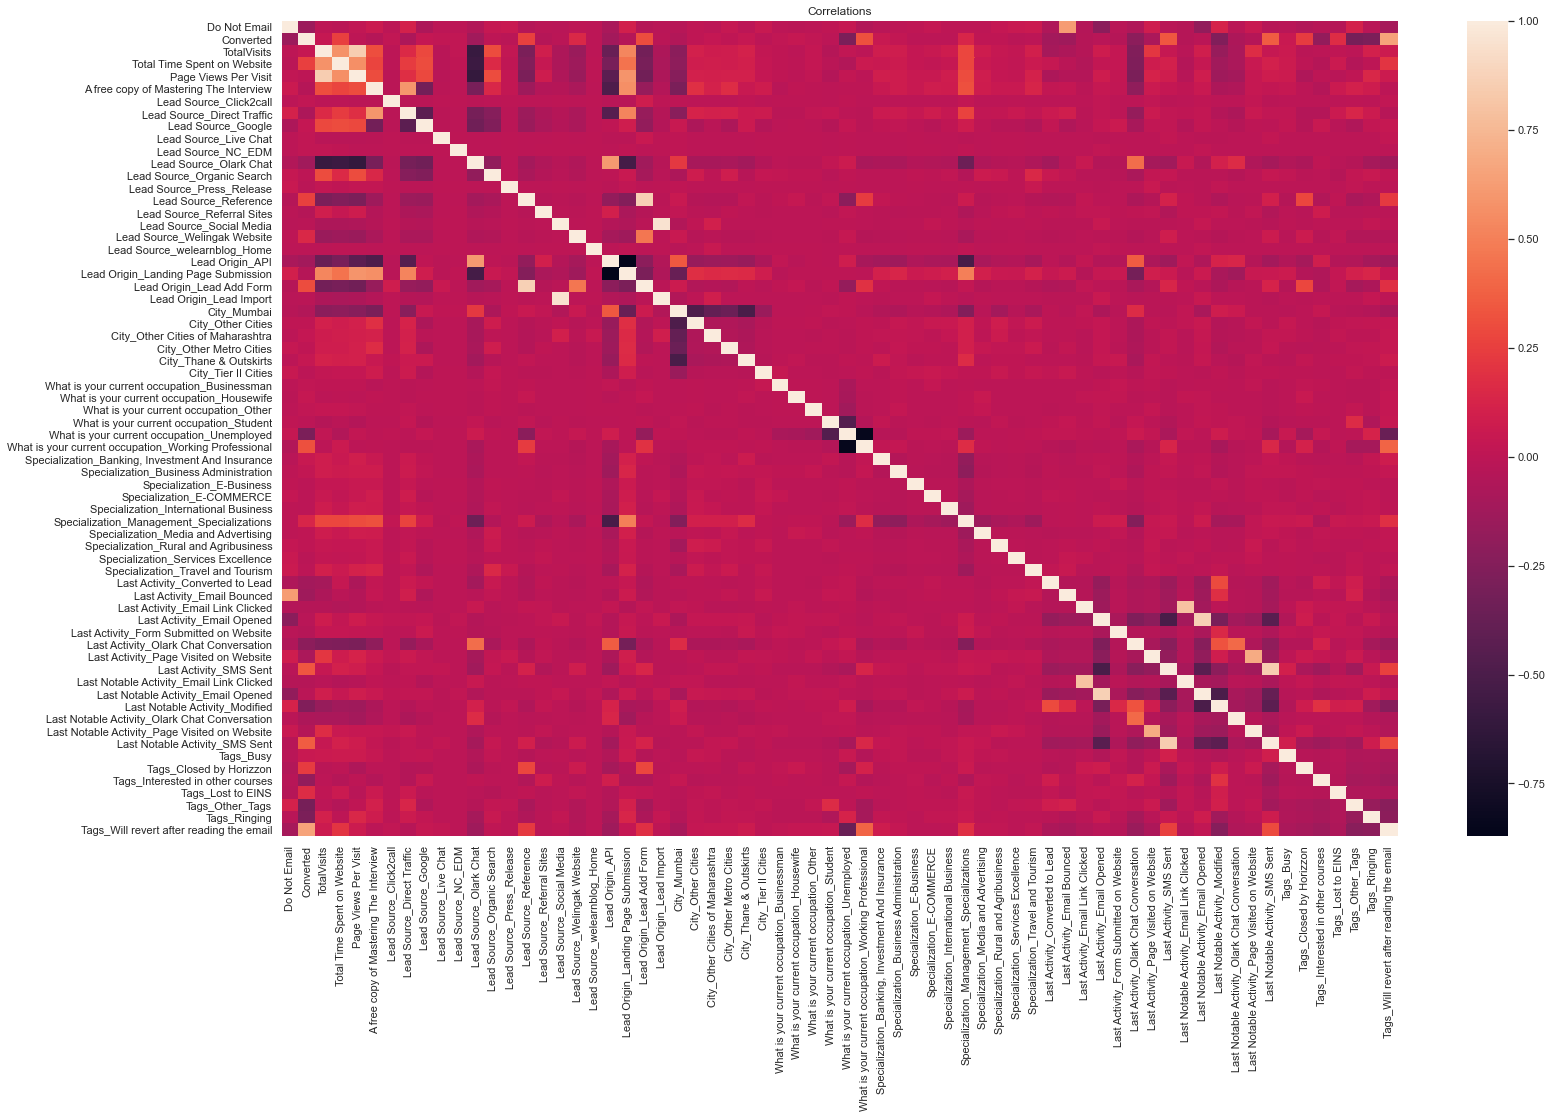

In [1413]:
# setting the figure size

plt.figure(figsize=(25,15))

# setting the title

plt.title('Correlations')

# Plotting a heatmap

sns.heatmap(final_lead_dataset.corr(method='spearman'))

plt.show()

### Insights:

From the above source, we can see that lead source and unemployed these two variables have high correlation.

### Dropping highly correlated variables

In [1414]:
corr_dummy=['Lead Source_Olark Chat','What is your current occupation_Unemployed']

X_train=X_train.drop(columns = corr_dummy)      # dropping from X train set

X_test=X_test.drop(columns=corr_dummy)       # dropping from X test set

In [1415]:
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Organic Search,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Lead Source_welearnblog_Home,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Working Professional,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
Lead Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
630949,0,-0.284595,-0.160255,-0.179666,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
649355,1,-0.284595,-0.540048,-0.179666,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
579735,0,-0.671384,-0.888650,-1.132538,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0
614238,0,-0.284595,1.643304,-0.179666,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
588625,0,0.295588,2.017593,0.058552,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0


In [1416]:
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Organic Search,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Lead Source_welearnblog_Home,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Working Professional,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
Lead Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
628652,0,4.0,157,4.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
644500,0,5.0,1513,5.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
588935,0,2.0,74,2.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
619437,0,0.0,0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
623381,0,8.0,164,8.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [1417]:
final_lead_dataset = final_lead_dataset.drop(columns = corr_dummy)

### Check the correlation Matrix again to avoid multi-collinearity:

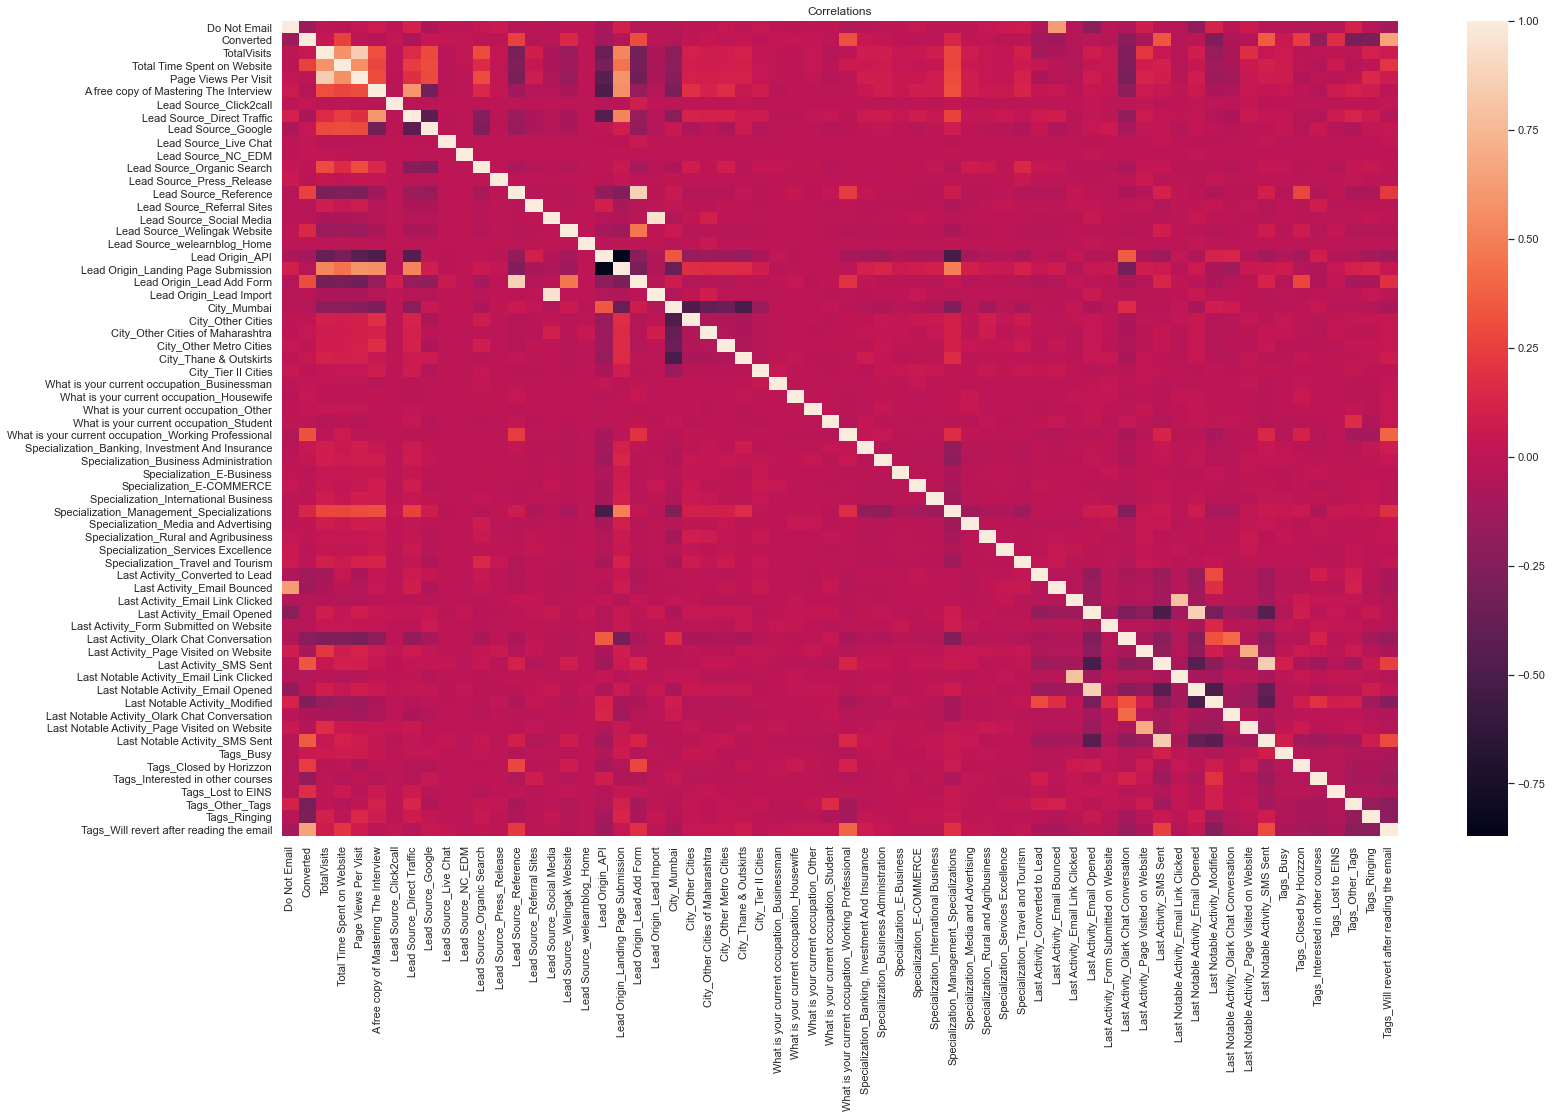

In [1418]:
# setting the figure size

plt.figure(figsize=(25,15))

# setting the title

plt.title('Correlations')

# Plotting a heatmap

sns.heatmap(final_lead_dataset.corr(method='spearman'))

plt.show()

#### Running First Train Model:

In [1419]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6289
Model Family:                Binomial   Df Model:                           61
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Wed, 08 Sep 2021   Deviance:                       48170.
Time:                        00:09:12   Pearson chi2:                 2.36e+18
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                 1.333e+14   1.25e+07   1.07e+07      0.000    1.33e+14    1.33e+14
Do Not Email                                         -7.388e+14   4.27e+06  -1.73e+08      0.000   -7.39e+14   -7.39e+14
TotalVisits                                           5.494e+13      1e+06   5.49e+07      0.000    5.49e+13    5.49e+13
Total Time Spent on Website                            3.74e+14   1.03e+06   3.63e+08      0.000    3.74e+14    3.74e+14
Page Views Per Visit                                 -4.809e+13   1.26e+06  -3.83e+07      0.000   -4.81e+13   -4.81e+13
A free copy of Mastering The Interview               -9.427e+13   2.69e+06  -3.51e+07      0.000   -9.43e+13   -9.43e+13
Lead Source_Click2call                                7.624e+14   6.14e+07   1.24e+07      0.000    7.62e+14    7.62e+14
Lead Source_Direct Traffic                            1.085e+14   3.94e+06   2.75e+07      0.000    1.09e+14    1.09e+14
Lead Source_Google                                    1.513e+14   3.43e+06   4.42e+07      0.000    1.51e+14    1.51e+14
Lead Source_Live Chat                                 3.889e+15   6.73e+07   5.78e+07      0.000    3.89e+15    3.89e+15
Lead Source_NC_EDM                                    5.105e+15   6.73e+07   7.59e+07      0.000     5.1e+15     5.1e+15
Lead Source_Organic Search                            9.285e+13   4.21e+06    2.2e+07      0.000    9.29e+13    9.29e+13
Lead Source_Press_Release                            -2.872e+15   6.79e+07  -4.23e+07      0.000   -2.87e+15   -2.87e+15
Lead Source_Reference                                 1.132e+15   4.77e+07   2.37e+07      0.000    1.13e+15    1.13e+15
Lead Source_Referral Sites                            3.591e+14   8.03e+06   4.47e+07      0.000    3.59e+14    3.59e+14
Lead Source_Social Media                             -1.409e+15   3.91e+07  -3.61e+07      0.000   -1.41e+15   -1.41e+15
Lead Source_Welingak Website                          2.307e+15   4.81e+07    4.8e+07      0.000    2.31e+15    2.31e+15
Lead Source_welearnblog_Home                         -3.511e+15   6.73e+07  -5.21e+07      0.000   -3.51e+15   -3.51e+15
Lead Origin_API                                      -2.047e+14   1.31e+07  -1.56e+07      0.000   -2.05e+14   -2.05e+14
Lead Origin_Landing Page Submission                  -5.536e+14   1.32e+07  -4.18e+07      0.000   -5.54e+14   -5.54e+14
Lead Origin_Lead Add Form                              -9.1e+14   3.88e+07  -2.35e+07      0.000    -9.1e+14    -9.1e+14
Lead Origin_Lead Import                               1.802e+15   3.43e+07   5.25e+07      0.000     1.8e+15     1.8e+15
City_Mumbai                                          -4.56

#### Feature Selection Using RFE:

In [1420]:
logreg = LogisticRegression()

#### initalize the model using RFE
rfe = RFE(logreg, 19)             # running RFE with 19 variables as output
rfe = rfe.fit(X_train, y_train)

In [1421]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 30),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 34),
 ('A free copy of Mastering The Interview', False, 29),
 ('Lead Source_Click2call', False, 39),
 ('Lead Source_Direct Traffic', False, 2),
 ('Lead Source_Google', False, 3),
 ('Lead Source_Live Chat', False, 45),
 ('Lead Source_NC_EDM', False, 9),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Press_Release', False, 38),
 ('Lead Source_Reference', False, 10),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Social Media', False, 16),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_welearnblog_Home', False, 25),
 ('Lead Origin_API', False, 17),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 19),
 ('City_Mumbai', False, 44),
 ('City_Other Cities', False, 36),
 ('City_Other Cities of Maharashtra', False, 43),
 ('City_Other Metro Cities', False, 

In [1422]:
col = X_train.columns[rfe.support_]

In [1423]:
print("len",len(col))

len 19


### Model Assessing with Statsmodels:

In [1424]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1163.8
Date:                Wed, 08 Sep 2021   Deviance:                       2327.5
Time:                        00:09:16   Pearson chi2:                 8.27e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.6594      0.103     -6.405      0.000      -0.861      -0.458
Do Not Email                                            -1.1301      0.273     -4.137      0.000      -1.666      -0.595
Total Time Spent on Website                              1.0453      0.059     17.849      0.000       0.930       1.160
Lead Source_Organic Search                              -0.3669      0.171     -2.143      0.032      -0.702      -0.031
Lead Source_Referral Sites                              -0.5899      0.497     -1.188      0.235      -1.563       0.384
Lead Source_Welingak Website                             3.8444      0.868      4.429      0.000       2.143       5.546
Lead Origin_Landing Page Submission                     -1.2008      0.124     -9.712      0.000      -1.443      -0.958
Lead Origin_Lead Add Form                                0.8496      0.470      1.806      0.071      -0.072       1.772
What is your current occupation_Working Professional     0.7786      0.441      1.767      0.077      -0.085       1.642
Last Activity_SMS Sent                                   1.3639      0.238      5.737      0.000       0.898       1.830
Last Notable Activity_Email Link Clicked                -0.8710      0.434     -2.005      0.045      -1.722      -0.019
Last Notable Activity_Modified                          -1.4903      0.160     -9.344      0.000      -1.803      -1.178
Last Notable Activity_Olark Chat Conversation           -1.5715      0.424     -3.705      0.000      -2.403      -0.740
Last Notable Activity_SMS Sent                           0.9744      0.273      3.564      0.000       0.439       1.510
Tags_Closed by Horizzon                                  6.6301      0.738      8.983      0.000       5.184       8.077
Tags_Interested in other courses                        -1.8894      0.348     -5.431      0.000      -2.571      -1.208
Tags_Lost to EINS                                        6.0810      0.734      8.279      0.000       4.641       7.521
Tags_Other_Tags                                         -2.5230      0.223    -11.298      0.000      -2.961      -2.085
Tags_Ringing                                            -3.8183      0.265    -14.431      0.000      -4.337      -3.300
Tags_Will revert after reading the email                 4.7135      0.214     22.064      0.000       4.295       5.132
========================================================================================================================
"""

#### Observations:


Now, From the above summary presented there are some features having high p -values, we will drop features which is having insignificant values one by one and create new model again and again until all the features attain significant p- value.



#### Check the VIF Again:

In [1426]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print("len",len(vif["Features"]))
vif

len 19


,Features,VIF
12,Last Notable Activity_SMS Sent,6.15
8,Last Activity_SMS Sent,6.05
5,Lead Origin_Landing Page Submission,2.15
18,Tags_Will revert after reading the email,1.98
6,Lead Origin_Lead Add Form,1.90
10,Last Notable Activity_Modified,1.84
4,Lead Source_Welingak Website,1.37
16,Tags_Other_Tags,1.34
7,What is your current occupation_Working Profes...,1.33
17,Tags_Ringing,1.31


### Observations:

Since p-value for Lead Source_Referral Sites is very high 0.235> 0.05, so eliminating from the columns and building the model 
again.

### Rebuild the model again:

In [1427]:
#### dropping lead source referral sites from the model
col = col.drop(['Lead Source_Referral Sites'],1)
#### adding constant value
X_train_sm = sm.add_constant(X_train[col])
#### building the model again 
logm_2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm_2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1164.5
Date:                Wed, 08 Sep 2021   Deviance:                       2329.1
Time:                        00:10:27   Pearson chi2:                 8.26e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.6768      0.102     -6.636      0.000      -0.877      -0.477
Do Not Email                                            -1.1357      0.273     -4.157      0.000      -1.671      -0.600
Total Time Spent on Website                              1.0434      0.059     17.835      0.000       0.929       1.158
Lead Source_Organic Search                              -0.3565      0.171     -2.084      0.037      -0.692      -0.021
Lead Source_Welingak Website                             3.8459      0.868      4.431      0.000       2.145       5.547
Lead Origin_Landing Page Submission                     -1.1884      0.123     -9.651      0.000      -1.430      -0.947
Lead Origin_Lead Add Form                                0.8629      0.470      1.835      0.066      -0.059       1.784
What is your current occupation_Working Professional     0.7821      0.442      1.771      0.077      -0.084       1.648
Last Activity_SMS Sent                                   1.3651      0.238      5.743      0.000       0.899       1.831
Last Notable Activity_Email Link Clicked                -0.8763      0.433     -2.022      0.043      -1.726      -0.027
Last Notable Activity_Modified                          -1.4861      0.159     -9.319      0.000      -1.799      -1.174
Last Notable Activity_Olark Chat Conversation           -1.5542      0.424     -3.667      0.000      -2.385      -0.723
Last Notable Activity_SMS Sent                           0.9785      0.273      3.580      0.000       0.443       1.514
Tags_Closed by Horizzon                                  6.6310      0.738      8.986      0.000       5.185       8.077
Tags_Interested in other courses                        -1.9308      0.347     -5.557      0.000      -2.612      -1.250
Tags_Lost to EINS                                        6.0858      0.734      8.287      0.000       4.646       7.525
Tags_Other_Tags                                         -2.5233      0.223    -11.298      0.000      -2.961      -2.086
Tags_Ringing                                            -3.8145      0.265    -14.420      0.000      -4.333      -3.296
Tags_Will revert after reading the email                 4.7125      0.214     22.065      0.000       4.294       5.131
========================================================================================================================
"""

#### Check the VIF Again: 

In [1429]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print("len",len(vif["Features"]))

vif

len 18


,Features,VIF
11,Last Notable Activity_SMS Sent,6.15
7,Last Activity_SMS Sent,6.05
4,Lead Origin_Landing Page Submission,2.15
17,Tags_Will revert after reading the email,1.97
5,Lead Origin_Lead Add Form,1.90
9,Last Notable Activity_Modified,1.83
3,Lead Source_Welingak Website,1.37
15,Tags_Other_Tags,1.34
6,What is your current occupation_Working Profes...,1.33
16,Tags_Ringing,1.31


#### Observations:

Since p-value for "What is your current occupation_Working Professional" is very high 0.077> 0.05, so eliminating from the columns and building the model 
again.

### Re-Built the Model Again:

In [1430]:
#### eliminate current occupation working professional 
col = col.drop(['What is your current occupation_Working Professional'],1)
#### adding constant to the columns
X_train_sm = sm.add_constant(X_train[col])
#### building model again 
logm_3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm_3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1166.2
Date:                Wed, 08 Sep 2021   Deviance:                       2332.5
Time:                        00:12:07   Pearson chi2:                 8.46e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.6721      0.102     -6.594      0.000      -0.872      -0.472
Do Not Email                                     -1.1256      0.273     -4.125      0.000      -1.660      -0.591
Total Time Spent on Website                       1.0445      0.059     17.849      0.000       0.930       1.159
Lead Source_Organic Search                       -0.3641      0.171     -2.129      0.033      -0.699      -0.029
Lead Source_Welingak Website                      3.7946      0.867      4.376      0.000       2.095       5.494
Lead Origin_Landing Page Submission              -1.1885      0.123     -9.651      0.000      -1.430      -0.947
Lead Origin_Lead Add Form                         0.9098      0.469      1.940      0.052      -0.009       1.829
Last Activity_SMS Sent                            1.3674      0.238      5.749      0.000       0.901       1.834
Last Notable Activity_Email Link Clicked         -0.8669      0.430     -2.017      0.044      -1.709      -0.024
Last Notable Activity_Modified                   -1.4919      0.159     -9.358      0.000      -1.804      -1.179
Last Notable Activity_Olark Chat Conversation    -1.5636      0.425     -3.679      0.000      -2.397      -0.731
Last Notable Activity_SMS Sent                    0.9724      0.273      3.557      0.000       0.437       1.508
Tags_Closed by Horizzon                           6.7227      0.737      9.126      0.000       5.279       8.167
Tags_Interested in other courses                 -1.9124      0.348     -5.499      0.000      -2.594      -1.231
Tags_Lost to EINS                                 6.1198      0.733      8.345      0.000       4.682       7.557
Tags_Other_Tags                                  -2.5129      0.223    -11.250      0.000      -2.951      -2.075
Tags_Ringing                                     -3.8143      0.265    -14.413      0.000      -4.333      -3.296
Tags_Will revert after reading the email          4.8356      0.207     23.381      0.000       4.430       5.241
=================================================================================================================
"""

#### VIF Check:

In [1432]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print("len",len(vif["Features"]))
vif

len 17


,Features,VIF
10,Last Notable Activity_SMS Sent,6.15
6,Last Activity_SMS Sent,6.05
4,Lead Origin_Landing Page Submission,2.14
5,Lead Origin_Lead Add Form,1.88
8,Last Notable Activity_Modified,1.83
16,Tags_Will revert after reading the email,1.76
3,Lead Source_Welingak Website,1.36
14,Tags_Other_Tags,1.34
15,Tags_Ringing,1.31
1,Total Time Spent on Website,1.27


#### Observations:

Since p-value for "Lead Origin Add Form" is very high 0.052> 0.05, so eliminating from the columns and building the model 
again.

In [1434]:
#### eliminate the columns again and built the model
col = col.drop(['Lead Origin_Lead Add Form'],1)
#### add constant again
X_train_sm = sm.add_constant(X_train[col])
logm_4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm_4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1168.2
Date:                Wed, 08 Sep 2021   Deviance:                       2336.4
Time:                        00:13:55   Pearson chi2:                 8.22e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.6490      0.101     -6.430      0.000      -0.847      -0.451
Do Not Email                                     -1.1011      0.271     -4.061      0.000      -1.632      -0.570
Total Time Spent on Website                       1.0378      0.059     17.724      0.000       0.923       1.153
Lead Source_Organic Search                       -0.3864      0.171     -2.255      0.024      -0.722      -0.051
Lead Source_Welingak Website                      4.6684      0.740      6.309      0.000       3.218       6.119
Lead Origin_Landing Page Submission              -1.2274      0.122    -10.079      0.000      -1.466      -0.989
Last Activity_SMS Sent                            1.4038      0.236      5.939      0.000       0.941       1.867
Last Notable Activity_Email Link Clicked         -0.8716      0.428     -2.035      0.042      -1.711      -0.032
Last Notable Activity_Modified                   -1.5156      0.159     -9.504      0.000      -1.828      -1.203
Last Notable Activity_Olark Chat Conversation    -1.5857      0.425     -3.731      0.000      -2.419      -0.753
Last Notable Activity_SMS Sent                    0.9467      0.272      3.476      0.001       0.413       1.480
Tags_Closed by Horizzon                           7.0234      0.725      9.684      0.000       5.602       8.445
Tags_Interested in other courses                 -1.9085      0.349     -5.476      0.000      -2.592      -1.225
Tags_Lost to EINS                                 6.1783      0.732      8.437      0.000       4.743       7.614
Tags_Other_Tags                                  -2.4950      0.223    -11.182      0.000      -2.932      -2.058
Tags_Ringing                                     -3.7746      0.264    -14.322      0.000      -4.291      -3.258
Tags_Will revert after reading the email          4.9271      0.202     24.357      0.000       4.531       5.324
=================================================================================================================
"""

#### Observations:

Since P-value is less than 0.05 , so no need to eliminate the values but make sure avoid the multi-collinearity.

#### Multi-collinearity:

In [1437]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print("len",len(vif["Features"]))

vif

len 16


,Features,VIF
9,Last Notable Activity_SMS Sent,6.15
5,Last Activity_SMS Sent,6.01
4,Lead Origin_Landing Page Submission,2.05
7,Last Notable Activity_Modified,1.83
15,Tags_Will revert after reading the email,1.52
13,Tags_Other_Tags,1.33
14,Tags_Ringing,1.30
1,Total Time Spent on Website,1.19
0,Do Not Email,1.15
2,Lead Source_Organic Search,1.15


#### Observations:

Since Last Notable Activity_SMS Sent has highest vif, eliminating it from the columns and building the model again.

In [1438]:
#### eliminating the notable activity sms sent from the columns
col = col.drop(['Last Notable Activity_SMS Sent'],1)
##### add the constant to the training model
X_train_sm = sm.add_constant(X_train[col])
#### build the model again
logm_5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm_5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1174.4
Date:                Wed, 08 Sep 2021   Deviance:                       2348.7
Time:                        00:17:38   Pearson chi2:                 8.24e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.5695      0.097     -5.861      0.000      -0.760      -0.379
Do Not Email                                     -1.0976      0.272     -4.040      0.000      -1.630      -0.565
Total Time Spent on Website                       1.0264      0.058     17.666      0.000       0.912       1.140
Lead Source_Organic Search                       -0.3685      0.169     -2.175      0.030      -0.701      -0.036
Lead Source_Welingak Website                      4.5851      0.739      6.201      0.000       3.136       6.034
Lead Origin_Landing Page Submission              -1.2325      0.121    -10.228      0.000      -1.469      -0.996
Last Activity_SMS Sent                            2.1107      0.121     17.514      0.000       1.874       2.347
Last Notable Activity_Email Link Clicked         -0.9717      0.431     -2.256      0.024      -1.816      -0.128
Last Notable Activity_Modified                   -1.8587      0.133    -14.021      0.000      -2.119      -1.599
Last Notable Activity_Olark Chat Conversation    -1.6656      0.424     -3.928      0.000      -2.497      -0.835
Tags_Closed by Horizzon                           7.2111      0.726      9.932      0.000       5.788       8.634
Tags_Interested in other courses                 -1.8777      0.350     -5.370      0.000      -2.563      -1.192
Tags_Lost to EINS                                 6.3128      0.736      8.581      0.000       4.871       7.755
Tags_Other_Tags                                  -2.4332      0.220    -11.056      0.000      -2.865      -2.002
Tags_Ringing                                     -3.6560      0.258    -14.153      0.000      -4.162      -3.150
Tags_Will revert after reading the email          4.9946      0.206     24.254      0.000       4.591       5.398
=================================================================================================================
"""

### VIF Check:

In [1439]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead Origin_Landing Page Submission,2.04
5,Last Activity_SMS Sent,1.51
7,Last Notable Activity_Modified,1.51
14,Tags_Will revert after reading the email,1.47
12,Tags_Other_Tags,1.32
13,Tags_Ringing,1.28
1,Total Time Spent on Website,1.19
2,Lead Source_Organic Search,1.15
0,Do Not Email,1.14
10,Tags_Interested in other courses,1.14


### Observations:

since p-value is less than 0.05 and we have considered signficant variables and vif is less than 5, so we builded a model with
15 variables.

#### Predicted values on training set:

In [1441]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

Lead Number
630949    0.122766
649355    0.030654
579735    0.007498
614238    0.880301
588625    0.998924
646388    0.998062
632041    0.062587
612248    0.970551
591797    0.997540
646673    0.035603
dtype: float64

In [1442]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.1227659 , 0.03065396, 0.00749817, 0.88030091, 0.99892412,
       0.99806205, 0.06258743, 0.97055094, 0.99754048, 0.03560334])

### Creating DataFrame with actual converted and predicted converted propabilities.


In [1443]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Lead_number'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Lead_number
0,0,0.122766,630949
1,0,0.030654,649355
2,0,0.007498,579735
3,1,0.880301,614238
4,1,0.998924,588625


### Creating new column 'predicted' with 1 if converted_prob > 0.5 else 0:

In [1444]:
y_train_pred_final['predicted_converted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Lead_number,predicted_converted
0,0,0.122766,630949,0
1,0,0.030654,649355,0
2,0,0.007498,579735,0
3,1,0.880301,614238,1
4,1,0.998924,588625,1


### Confusion Matrix:

In [1445]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted_converted)
print(confusion)

[[3760  145]
 [ 266 2180]]


In [1446]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [1447]:
print("True Positives are  {} and True Negatives are {}".format(TP,TN))
print("False Positives are  {} and False Negatives are {}".format(FP,FN))


True Positives are  2180 and True Negatives are 3760
False Positives are  145 and False Negatives are 266


### Sensitivity and Specificity:

In [1448]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8912510220768601

In [1449]:
# Let us calculate specificity
TN / float(TN+FP)

0.9628681177976952

In [1450]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.03713188220230474


In [1451]:
# positive predictive value 
print (TP / float(TP+FP))

0.9376344086021505


In [1452]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9339294585196225


In [1453]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted_converted)

0.9352857817666509

### Observations:

- Training Accuracy - 93.52%
- Sensitivity for Training data - 89.12%
- Specificity for Training data - 96.28%
- False Positive Rate - 3.7%

#### We have decided manually for optimal point but lets find out where exactly sensitivity,specificity and accuracy will meet.

### Plotting the roc-auc score:

In [1454]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [1455]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

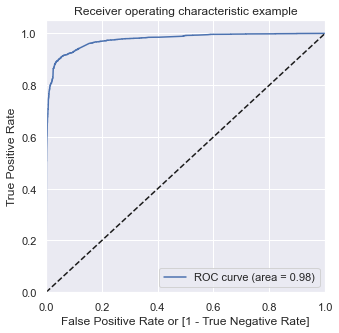

In [1456]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

#### Observations:

- The ROC Curve should be a value close to 1. We are getting a good value of 0.97 indicating a good predictive model.



## Step 10: Finding Optimal Cutoff Point:

In [1457]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Lead_number,predicted_converted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.122766,630949,0,1,1,0,0,0,0,0,0,0,0
1,0,0.030654,649355,0,1,0,0,0,0,0,0,0,0,0
2,0,0.007498,579735,0,1,0,0,0,0,0,0,0,0,0
3,1,0.880301,614238,1,1,1,1,1,1,1,1,1,1,0
4,1,0.998924,588625,1,1,1,1,1,1,1,1,1,1,1


In [1458]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.856243  0.972200  0.783611
0.2   0.2  0.906786  0.937858  0.887324
0.3   0.3  0.922847  0.918234  0.925736
0.4   0.4  0.931664  0.904742  0.948528
0.5   0.5  0.935286  0.891251  0.962868
0.6   0.6  0.933081  0.872445  0.971063
0.7   0.7  0.916391  0.817253  0.978489
0.8   0.8  0.911353  0.791087  0.986684
0.9   0.9  0.897182  0.746934  0.991293


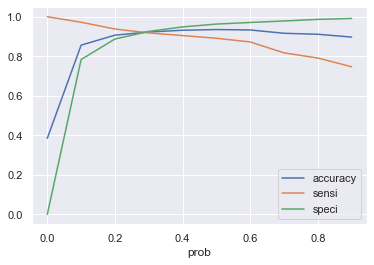

In [1459]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

### Observations:

- Since from the propability we can see that 0.4 is the optimal point to classify the predicted probalities.

#### Predictions on Train set again: if predicted converted> 0.4 then 1 else 0

In [1460]:
y_train_pred_final['predicted_converted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.4 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Lead_number,predicted_converted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.122766,630949,0,1,1,0,0,0,0,0,0,0,0
1,0,0.030654,649355,0,1,0,0,0,0,0,0,0,0,0
2,0,0.007498,579735,0,1,0,0,0,0,0,0,0,0,0
3,1,0.880301,614238,1,1,1,1,1,1,1,1,1,1,0
4,1,0.998924,588625,1,1,1,1,1,1,1,1,1,1,1


#### Training Accuracy:

In [1461]:
print("Training-Accuracy-score",metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted_converted))

Training-Accuracy-score 0.9316643048338844


In [1462]:
training_confusion_matrix = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted_converted )
training_confusion_matrix

array([[3704,  201],
       [ 233, 2213]], dtype=int64)

In [1463]:
TP = training_confusion_matrix[1,1] # true positive 
TN = training_confusion_matrix[0,0] # true negatives
FP = training_confusion_matrix[0,1] # false positives
FN = training_confusion_matrix[1,0] # false negatives

In [1464]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9047424366312347

In [1465]:
# Let us calculate specificity
TN / float(TN+FP)

0.948527528809219

In [1466]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.05147247119078105


In [1467]:
# Positive predictive value 
print (TP / float(TP+FP))

0.9167357083678542


In [1468]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9408178816357633


### Precision and Recall:

In [1469]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted_converted)

0.9167357083678542

In [1470]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted_converted)

0.9047424366312347

#### Final Words about the Training set:

- We can see that training model performing very good.The ROC curve has a value of 0.97, which is very good.

- Training Accuracy - 93.16%
- Sensitivity for Training data - 90.47%
- Specificity for Training data - 94.85%
- False Positive Rate - 5%
- Precision Score - 91.67%
- Recall Score - 90.47%

### Observations:

### Making Predictions on Test set:

#### Standardization the test set numerical variables:

In [1471]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])


In [1472]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Source_Organic Search,Lead Source_Welingak Website,Lead Origin_Landing Page Submission,Last Activity_SMS Sent,Last Notable Activity_Email Link Clicked,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
Lead Number,,,,,,,,,,,,,,,
628652,0,-0.591008,0,0,0,0,0,0,0,0,0,0,0,0,0
644500,0,1.894051,0,0,1,0,0,0,0,0,0,0,0,0,1
588935,0,-0.743117,0,0,0,0,0,0,0,0,0,0,0,0,0
619437,0,-0.878732,0,0,0,0,0,1,0,1,0,0,0,0,0
623381,0,-0.578179,1,0,1,0,0,0,0,0,0,0,0,0,0


In [1473]:
#### adding a constant for test set.
X_test_sm = sm.add_constant(X_test)

### Making predictions on the test set:

In [1474]:
y_test_pred = res.predict(X_test_sm)

In [1475]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [1476]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [1477]:
y_test_df['Lead Number'] = y_test_df.index

In [1478]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [1479]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [1480]:
y_pred_final= y_pred_final.rename(columns={ 0 : 'convertd_prob'})

In [1481]:
y_pred_final.head()

,Converted,Lead Number,convertd_prob
0,0,628652,0.235757
1,1,644500,0.994157
2,0,588935,0.208795
3,1,619437,0.979788
4,0,623381,0.059305


In [1482]:
y_pred_final['converted_predicted'] = y_pred_final.convertd_prob.map(lambda x: 1 if x > 0.42 else 0)

In [1483]:
y_pred_final.head()

,Converted,Lead Number,convertd_prob,converted_predicted
0,0,628652,0.235757,0
1,1,644500,0.994157,1
2,0,588935,0.208795,0
3,1,619437,0.979788,1
4,0,623381,0.059305,0


#### Metrics For Test set: 

In [1484]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.converted_predicted)

0.9173705471905986

In [1485]:
test_set_confusion_matrix = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.converted_predicted )
test_set_confusion_matrix

array([[1630,  104],
       [ 121,  868]], dtype=int64)

In [1486]:
TP = test_set_confusion_matrix[1,1] # true positive 
TN = test_set_confusion_matrix[0,0] # true negatives
FP = test_set_confusion_matrix[0,1] # false positives
FN = test_set_confusion_matrix[1,0] # false negatives

In [1487]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8776541961577351

In [1488]:
# Let us calculate specificity
TN / float(TN+FP)

0.9400230680507498

In [1489]:
precision_score(y_pred_final.Converted, y_pred_final.converted_predicted)

0.8930041152263375

In [1490]:
recall_score(y_pred_final.Converted, y_pred_final.converted_predicted)

0.8776541961577351

In [1491]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.05997693194925029


#### Final Words for Test set:

- Test Accuracy - 91.73%
- Sensitivity for Test data - 87.76%
- Specificity for Test data - 94.00%
- Precision Score for Test Data - 89.30%
- Recall Score for Test Data - 87.76%

### Summary:

### Train Data: 
  - Accuracy : 93.16%
  - Sensitivity : 90.47%
  - Specificity : 94.85%

### Test Data: 
  - Accuracy : 91.73%
  - Sensitivity : 87.76%
  -  Specificity : 94.00%


- The Model seems to predict the Conversion Rate very well and we should be able to give the CEO confidence in making good calls based on this model